### STUDY, REVIEW EXISTING PREDICTION MODELS FOR AIR QUALITY INDEX OF INDIA AND BUILD A MULTIVARIATE CLASSIFICATION MODEL.
### Author: Girish Devappa
### Submitted Date: March 08 /  March / 2022
### Program: MSc Data Science, LJMU and UPGRAD 
### Source code share [optional]

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
sns.set()

In [3]:
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.vecm import coint_johansen #Johansen Cointegration test
from scipy.stats import boxcox

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
df_petroleum_sales = pd.read_csv("Petro_PRODUCTS_SALES-STATE-WISE.csv")

In [6]:
df_petroleum_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE/UT  38 non-null     object
 1   2015      38 non-null     object
 2   2016      38 non-null     object
 3   2017      38 non-null     object
 4   2018      38 non-null     object
 5   2019      38 non-null     object
 6   2020      38 non-null     object
dtypes: object(7)
memory usage: 2.2+ KB


In [7]:
df_petroleum_sales

,STATE/UT,2015,2016,2017,2018,2019,2020
0,CHANDIGARH,440.26165,387.98365,426.58575,435.16184,435.8654758,312.0462309
1,DELHI,4996.69673,4881.71322,4998.94978,4890.48556,4621.385537,2911.277184
2,HARYANA,10773.69923,10720.77863,10974.08757,10522.6689,10222.7708,9852.998873
3,HIMACHAL PRADESH,1549.25863,1707.42894,1578.08408,1558.83099,1693.505046,1527.838183
4,JAMMU & KASHMIR,1341.49201,1258.65347,1444.0688,1502.72005,1371.69806,1300.818672
5,PUNJAB,5962.29691,6346.40801,6787.74599,7063.32412,7113.901901,5964.00485
6,RAJASTHAN,11217.74665,10983.55412,11267.14144,11402.74899,10920.63487,9179.391579
7,UTTAR PRADESH,15011.66659,15929.62646,16890.64068,18180.43239,18407.20688,18090.21955
8,UTTARAKHAND,1519.44165,1486.22273,1525.59701,1725.49317,1655.701481,1533.610266
9,Region Total,52812.56005,53702.36923,55892.9011,57281.86601,56570.99549,50812.81997


In [8]:
df_petroleum_sales.columns

Index(['STATE/UT', '2015', '2016', '2017', '2018', '2019', '2020'], dtype='object')

In [9]:
cols = ['2015', '2016', '2017', '2018', '2019', '2020']

In [10]:
df_petroleum_sales.replace(',','', regex=True, inplace=True)

In [11]:
df_petroleum_sales[cols] = df_petroleum_sales[cols].apply(pd.to_numeric, axis = 1)

In [12]:
df_petroleum_sales[cols] = np.round(df_petroleum_sales[cols], decimals = 2)

In [13]:
df_petroleum_sales

,STATE/UT,2015,2016,2017,2018,2019,2020
0,CHANDIGARH,440.26,387.98,426.59,435.16,435.87,312.05
1,DELHI,4996.70,4881.71,4998.95,4890.49,4621.39,2911.28
2,HARYANA,10773.70,10720.78,10974.09,10522.67,10222.77,9853.00
3,HIMACHAL PRADESH,1549.26,1707.43,1578.08,1558.83,1693.51,1527.84
4,JAMMU & KASHMIR,1341.49,1258.65,1444.07,1502.72,1371.70,1300.82
5,PUNJAB,5962.30,6346.41,6787.75,7063.32,7113.90,5964.00
6,RAJASTHAN,11217.75,10983.55,11267.14,11402.75,10920.63,9179.39
7,UTTAR PRADESH,15011.67,15929.63,16890.64,18180.43,18407.21,18090.22
8,UTTARAKHAND,1519.44,1486.22,1525.60,1725.49,1655.70,1533.61
9,Region Total,52812.56,53702.37,55892.90,57281.87,56571.00,50812.82


In [14]:
df_Coal_datafile = pd.read_csv("Coal_datafile.csv")

In [15]:
df_Coal_datafile

,2015,2016,2017,2018,2019,2020
0,761.66,836.73,837.22,898.52,968.25,954.72


In [16]:
df_Petroleum_Consumption = pd.read_csv("Petroleum_Consumption.csv")

In [17]:
df_Petroleum_Consumption[cols] = np.round(df_Petroleum_Consumption[cols], decimals = 2)

In [18]:
df_Petroleum_Consumption

,Products,2015,2016,2017,2018,2019,2020
0,LPG,19623.3,21608.2,23341.82,24906.8,26329.78,27558.43
1,Naphtha,13270.9,13240.8,12888.61,14131.2,14267.78,14100.36
2,MS,21846.5,23764.8,26174.48,28284.3,29975.49,27968.99
3,ATF,6261.9,6997.6,7632.68,8300.0,7998.61,3697.75
4,SKO,6826.4,5396.7,3845.12,3459.5,2396.82,1797.87
5,HSD,74647.0,76026.8,81073.44,83528.2,82602.01,72712.73
6,LDO,407.2,449.0,523.79,598.1,627.80,855.06
7,Lubricants & Greases,3571.2,3470.1,3883.88,3667.9,3833.39,4097.30
8,FO & LSHS,6632.1,7150.4,6720.97,6563.5,6301.54,5586.48
9,Bitumen,5937.9,5935.4,6085.85,6707.6,6720.37,7523.92


In [19]:
df_Petroleum_Consumption

,Products,2015,2016,2017,2018,2019,2020
0,LPG,19623.3,21608.2,23341.82,24906.8,26329.78,27558.43
1,Naphtha,13270.9,13240.8,12888.61,14131.2,14267.78,14100.36
2,MS,21846.5,23764.8,26174.48,28284.3,29975.49,27968.99
3,ATF,6261.9,6997.6,7632.68,8300.0,7998.61,3697.75
4,SKO,6826.4,5396.7,3845.12,3459.5,2396.82,1797.87
5,HSD,74647.0,76026.8,81073.44,83528.2,82602.01,72712.73
6,LDO,407.2,449.0,523.79,598.1,627.80,855.06
7,Lubricants & Greases,3571.2,3470.1,3883.88,3667.9,3833.39,4097.30
8,FO & LSHS,6632.1,7150.4,6720.97,6563.5,6301.54,5586.48
9,Bitumen,5937.9,5935.4,6085.85,6707.6,6720.37,7523.92


In [20]:
df_Population_datafile = pd.read_csv("Population_datafile.csv")

In [21]:
df_Population_datafile

,India / State/ Union Territory,Population 2011,Decadal Population Growth Rate - 2001-2011,Population Density (per sq.km) - 2011
0,Andhra Pradesh,49386799,9.0,308
1,Arunachal Pradesh,1383727,26.0,17
2,Assam,31205576,17.1,398
3,Bihar,104099452,25.4,1106
4,Chhattisgarh,25545198,22.6,189
5,Goa,1458545,8.2,394
6,Gujarat,60439692,19.3,308
7,Haryana,25351462,19.9,573
8,Himachal Pradesh,6864602,12.9,123
9,Jammu & Kashmir,12541302,23.6,56


## Univariate analysis

In [22]:
df_2015_SO2 = pd.read_csv("2015-SO2.csv")

In [23]:
df_2015_SO2

,Location,SO2-2015,SO2-2016
0,Saraikela Kharsawan,36,37
1,Jamshedpur,34,36
2,Nagda,30,27
3,Thane,28,20
4,Pune,27,36
5,Nanded,27,27
6,Dehradun,26,26
7,Byrnihat,25,42
8,Rishikesh,25,23
9,Ghaziabad,24,15


In [24]:
df_2015_NO2 = pd.read_csv("2015-NO2.csv")

In [25]:
df_2015_PM2_5 = pd.read_csv("2015-PM2.5.csv")

In [26]:
df_2015_PM10 = pd.read_csv("2015-PM10.csv")

In [27]:
df_2016_SO2 = pd.read_csv("2016-SO2.csv")

In [28]:
df_2016_NO2 = pd.read_csv("2016-NO2.csv")

In [29]:
df_2016_PM2_5 = pd.read_csv("2016-PM2.5.csv")

In [30]:
df_2016_PM10 = pd.read_csv("2016-PM10.csv")

In [31]:
df_2017_SO2 = pd.read_csv("2017-SO2.csv")

In [32]:
df_2017_NO2 = pd.read_csv("2017-NO2.csv")

In [33]:
df_2017_PM2_5 = pd.read_csv("2017-PM2.5.csv")

In [34]:
df_2017_PM10 = pd.read_csv("2017-PM10.csv")

In [35]:
df_2018_SO2 = pd.read_csv("2018-SO2.csv")

In [36]:
df_2018_NO2 = pd.read_csv("2018-NO2.csv")

In [37]:
df_2018_PM2_5 = pd.read_csv("2018-PM2.5.csv")

In [38]:
df_2018_PM10 = pd.read_csv("2018-PM10.csv")

In [39]:
df_2019_SO2 = pd.read_csv("2019-SO2.csv")

In [40]:
df_2019_NO2 = pd.read_csv("2019-NO2.csv")

In [41]:
df_2019_PM2_5 = pd.read_csv("2019-PM2.5.csv")

In [42]:
df_2019_PM10 = pd.read_csv("2019-PM10.csv")

In [43]:
df_2020_SO2 = pd.read_csv("2020-SO2.csv")

In [44]:
df_2020_NO2 = pd.read_csv("2020-NO2.csv")

In [45]:
df_2020_PM2_5 = pd.read_csv("2020-PM2.5.csv")

In [46]:
df_2020_PM10 = pd.read_csv("2020-PM10.csv")

<AxesSubplot:xlabel='PM10-2015', ylabel='Location'>

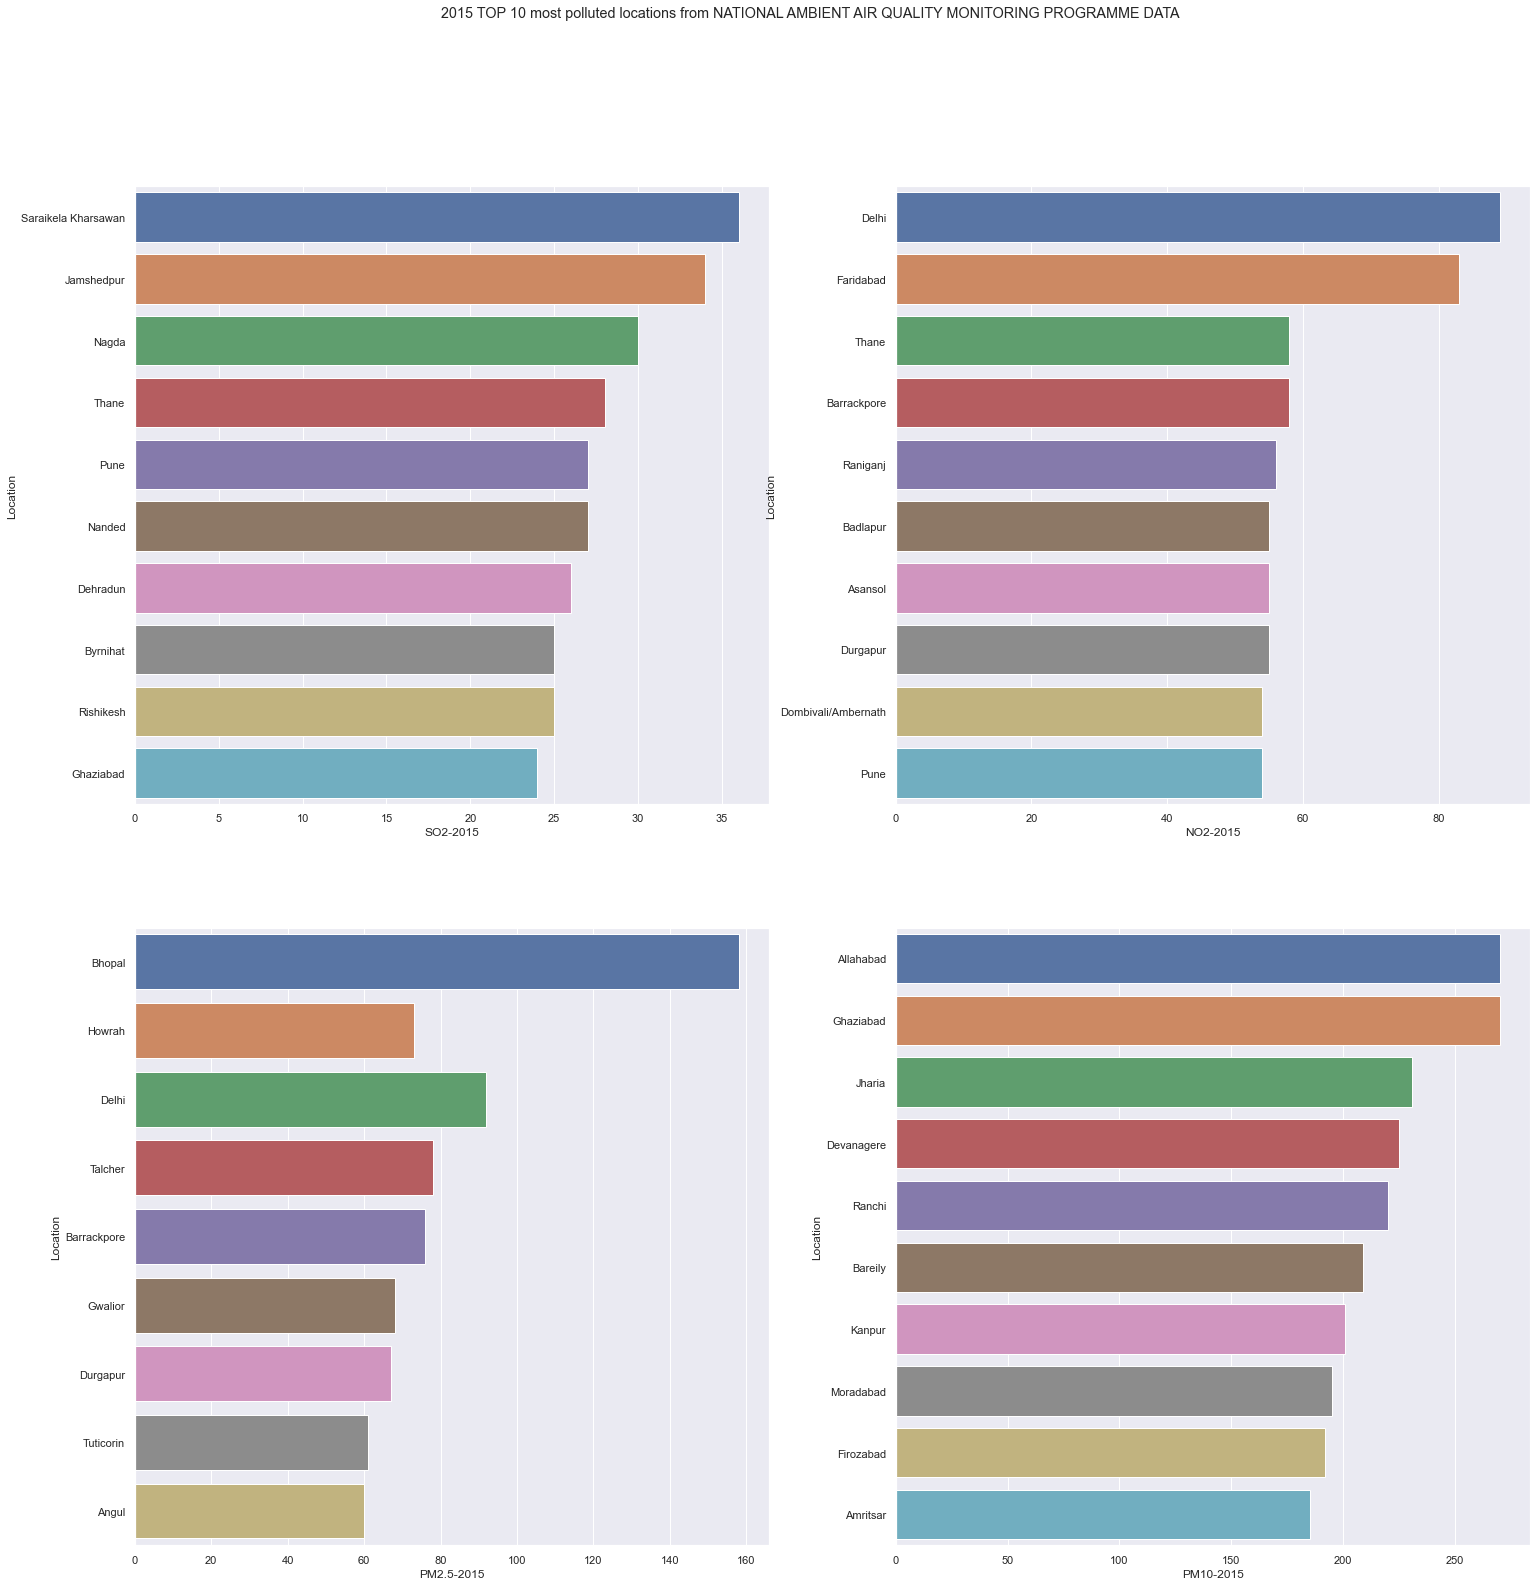

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(25,25))
fig.suptitle('2015 TOP 10 most polluted locations from NATIONAL AMBIENT AIR QUALITY MONITORING PROGRAMME DATA')
sns.barplot(ax=axes[0,0], x=df_2015_SO2['SO2-2015'], y=df_2015_SO2.Location)
sns.barplot(ax=axes[0,1], x=df_2015_NO2['NO2-2015'], y=df_2015_NO2.Location)
sns.barplot(ax=axes[1,0], x=df_2015_PM2_5['PM2.5-2015'], y=df_2015_PM2_5.Location)
sns.barplot(ax=axes[1,1], x=df_2015_PM10['PM10-2015'], y=df_2015_PM10.Location)

<AxesSubplot:xlabel='PM10-2016', ylabel='Location'>

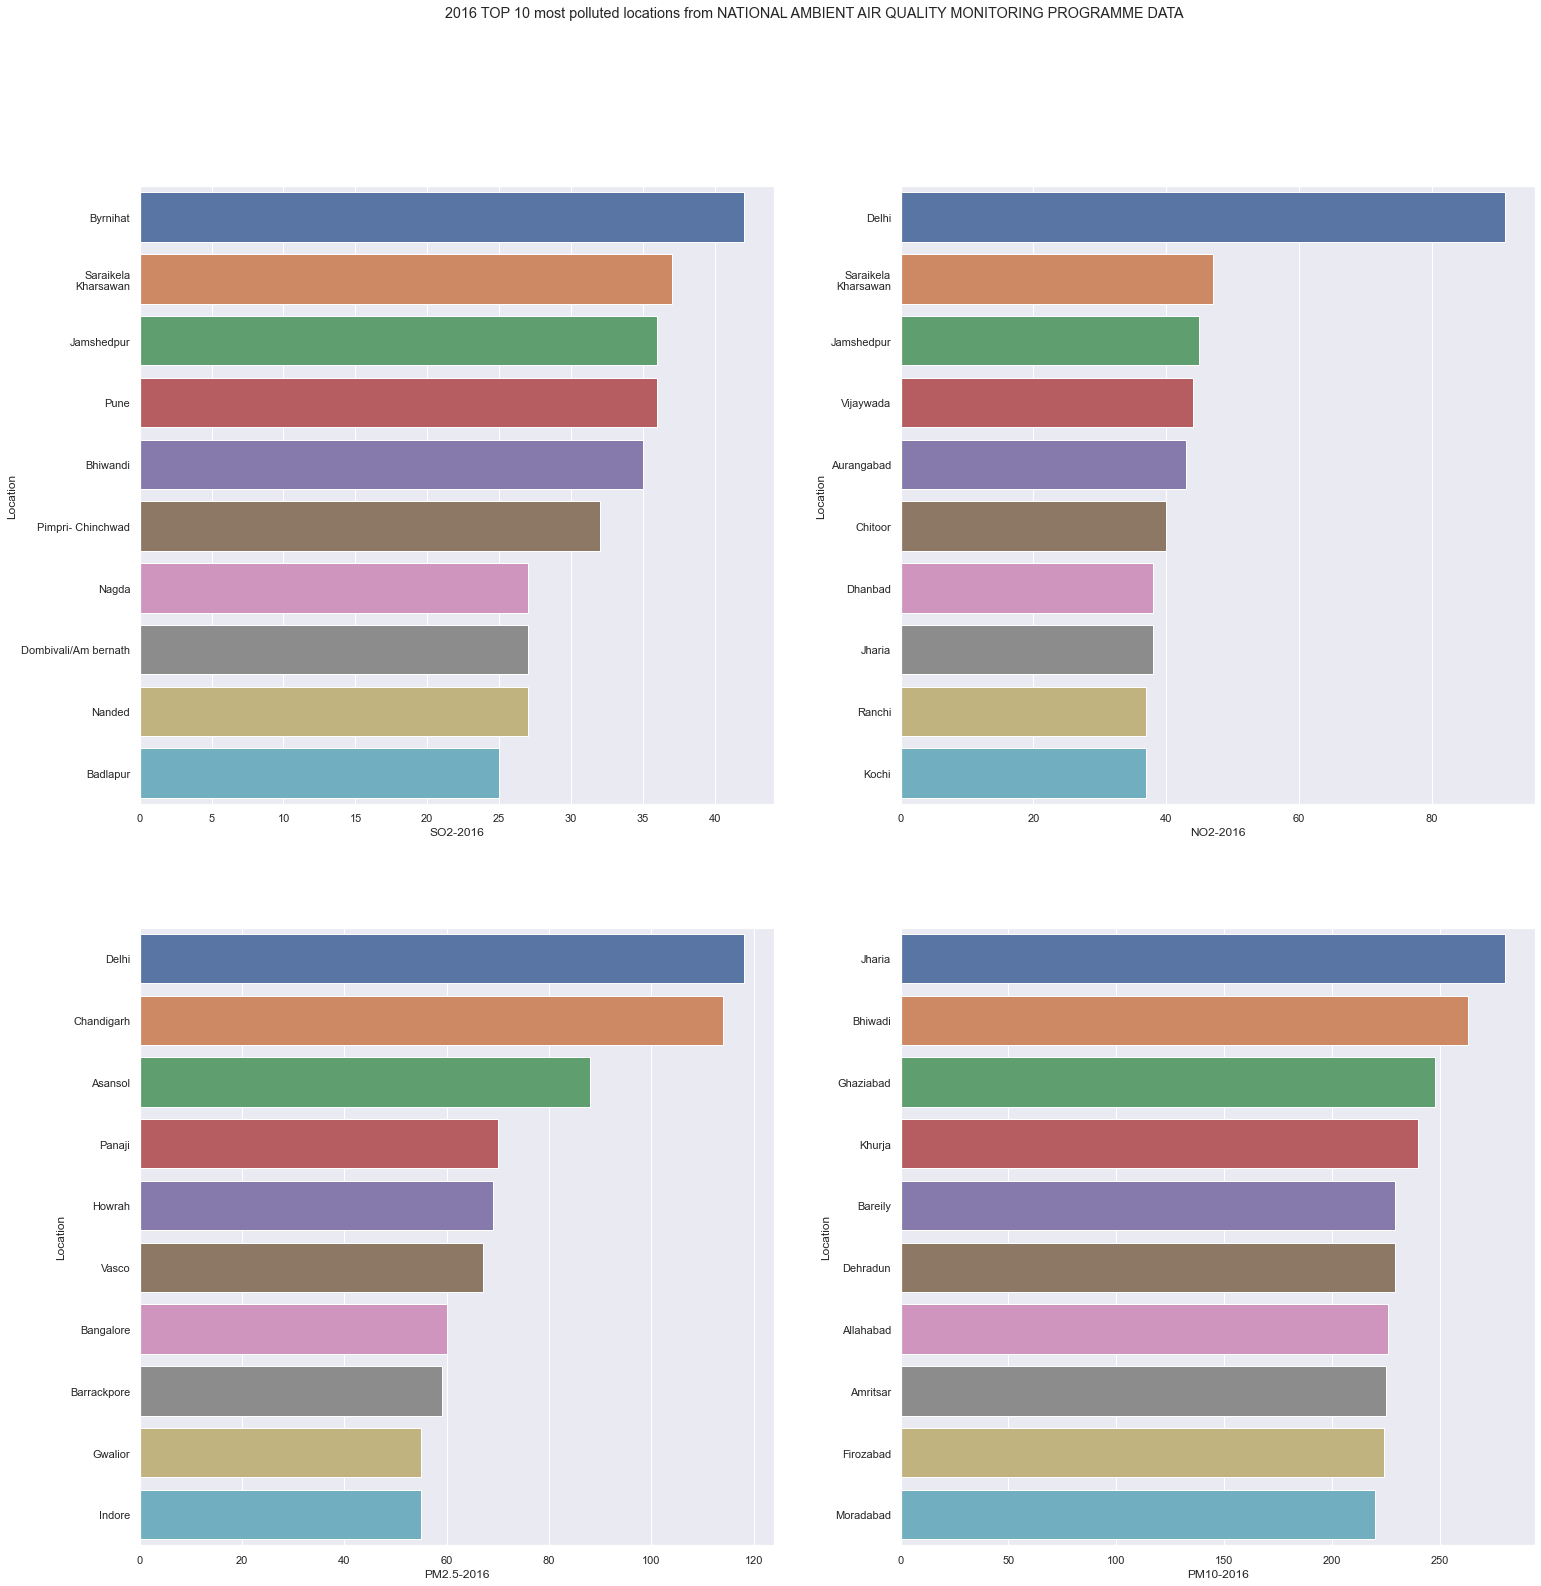

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(25,25))
fig.suptitle('2016 TOP 10 most polluted locations from NATIONAL AMBIENT AIR QUALITY MONITORING PROGRAMME DATA')
sns.barplot(ax=axes[0,0], x=df_2016_SO2['SO2-2016'], y=df_2016_SO2.Location)
sns.barplot(ax=axes[0,1], x=df_2016_NO2['NO2-2016'], y=df_2016_NO2.Location)
sns.barplot(ax=axes[1,0], x=df_2016_PM2_5['PM2.5-2016'], y=df_2016_PM2_5.Location)
sns.barplot(ax=axes[1,1], x=df_2016_PM10['PM10-2016'], y=df_2016_PM10.Location)

<AxesSubplot:xlabel='PM10-2017', ylabel='Location'>

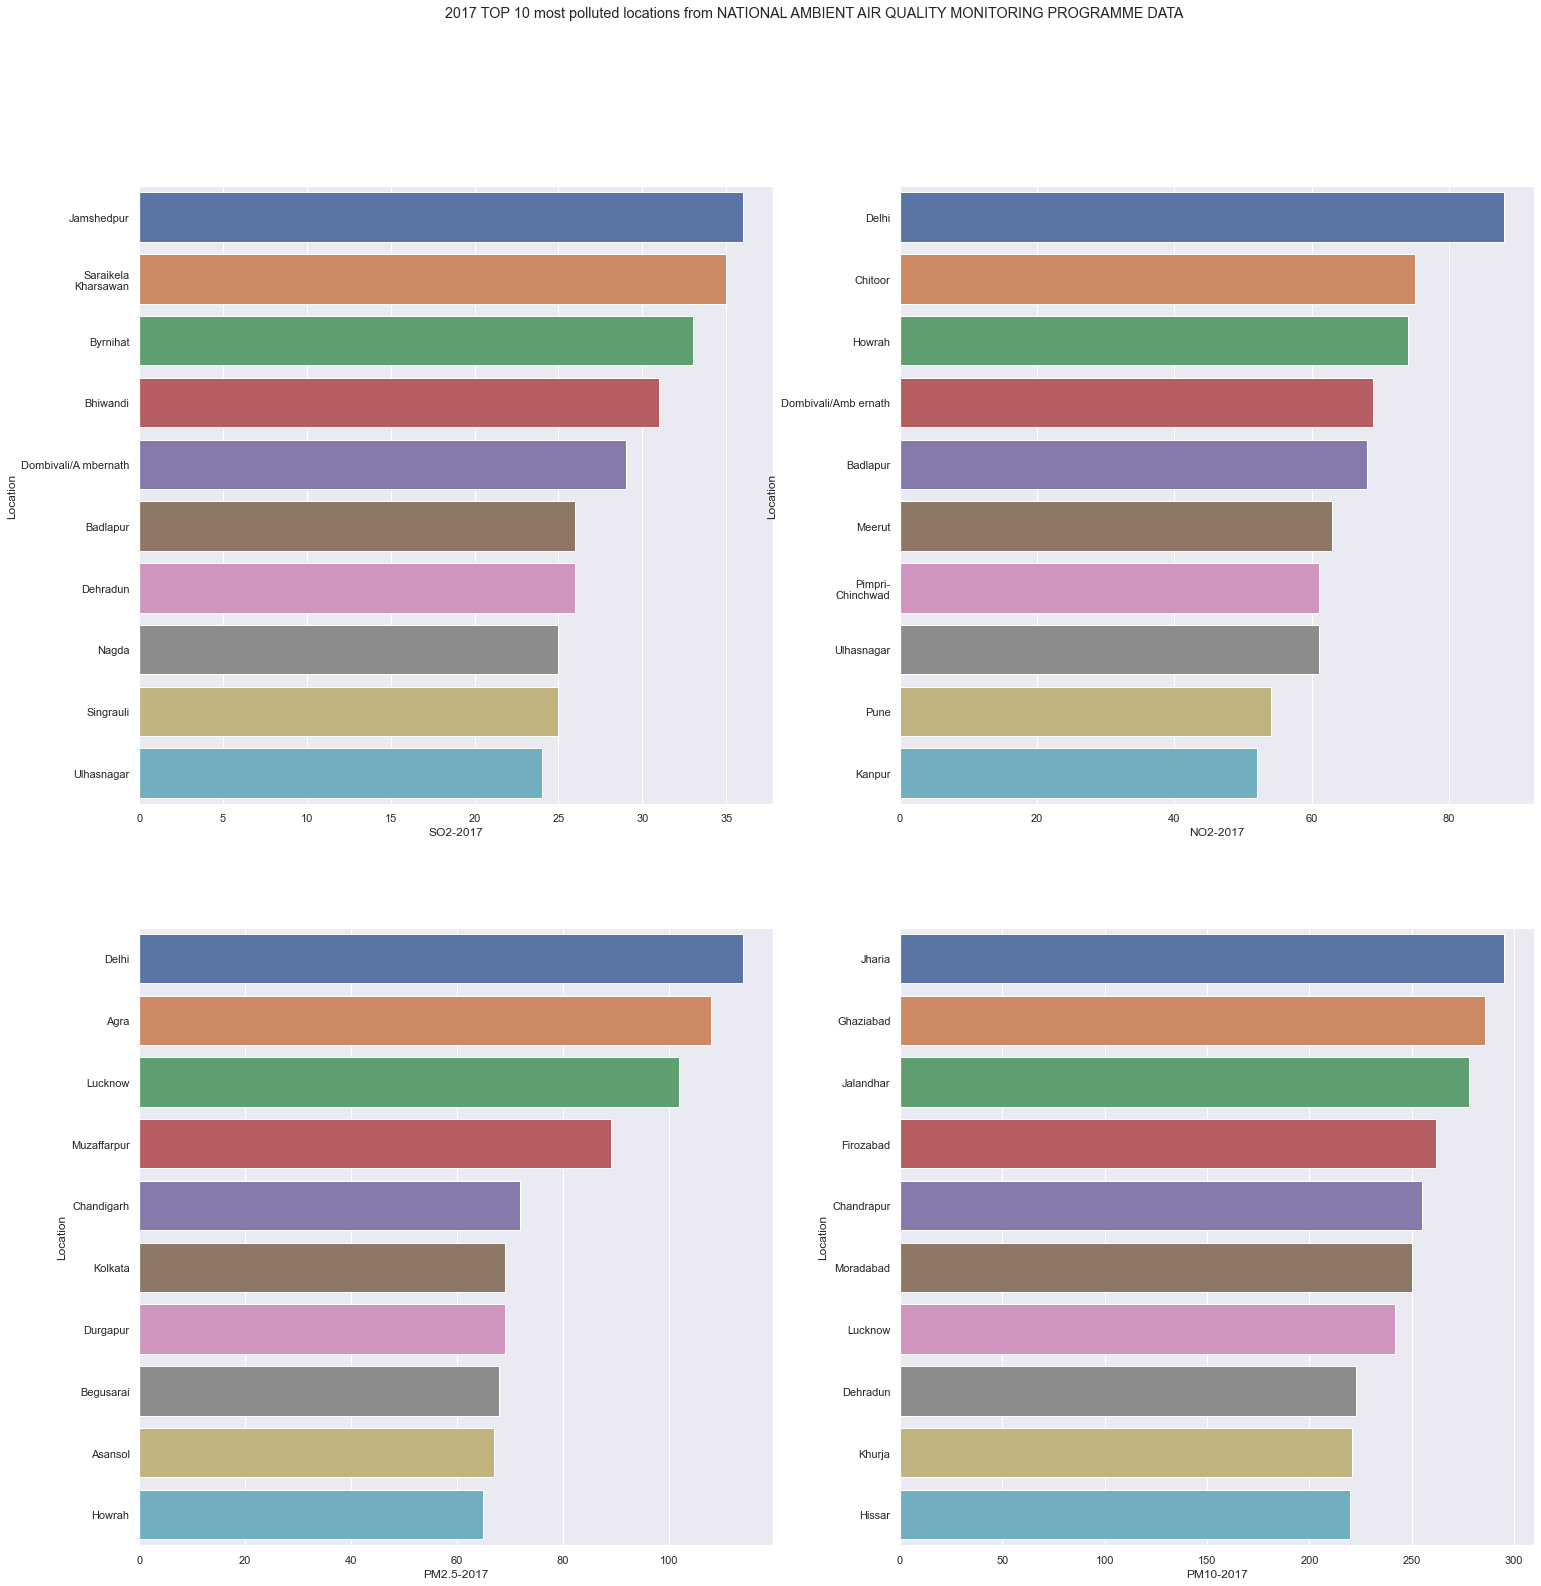

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(25,25))
fig.suptitle('2017 TOP 10 most polluted locations from NATIONAL AMBIENT AIR QUALITY MONITORING PROGRAMME DATA')
sns.barplot(ax=axes[0,0], x=df_2017_SO2['SO2-2017'], y=df_2017_SO2.Location)
sns.barplot(ax=axes[0,1], x=df_2017_NO2['NO2-2017'], y=df_2017_NO2.Location)
sns.barplot(ax=axes[1,0], x=df_2017_PM2_5['PM2.5-2017'], y=df_2017_PM2_5.Location)
sns.barplot(ax=axes[1,1], x=df_2017_PM10['PM10-2017'], y=df_2017_PM10.Location)

<AxesSubplot:xlabel='PM10-2018', ylabel='Location'>

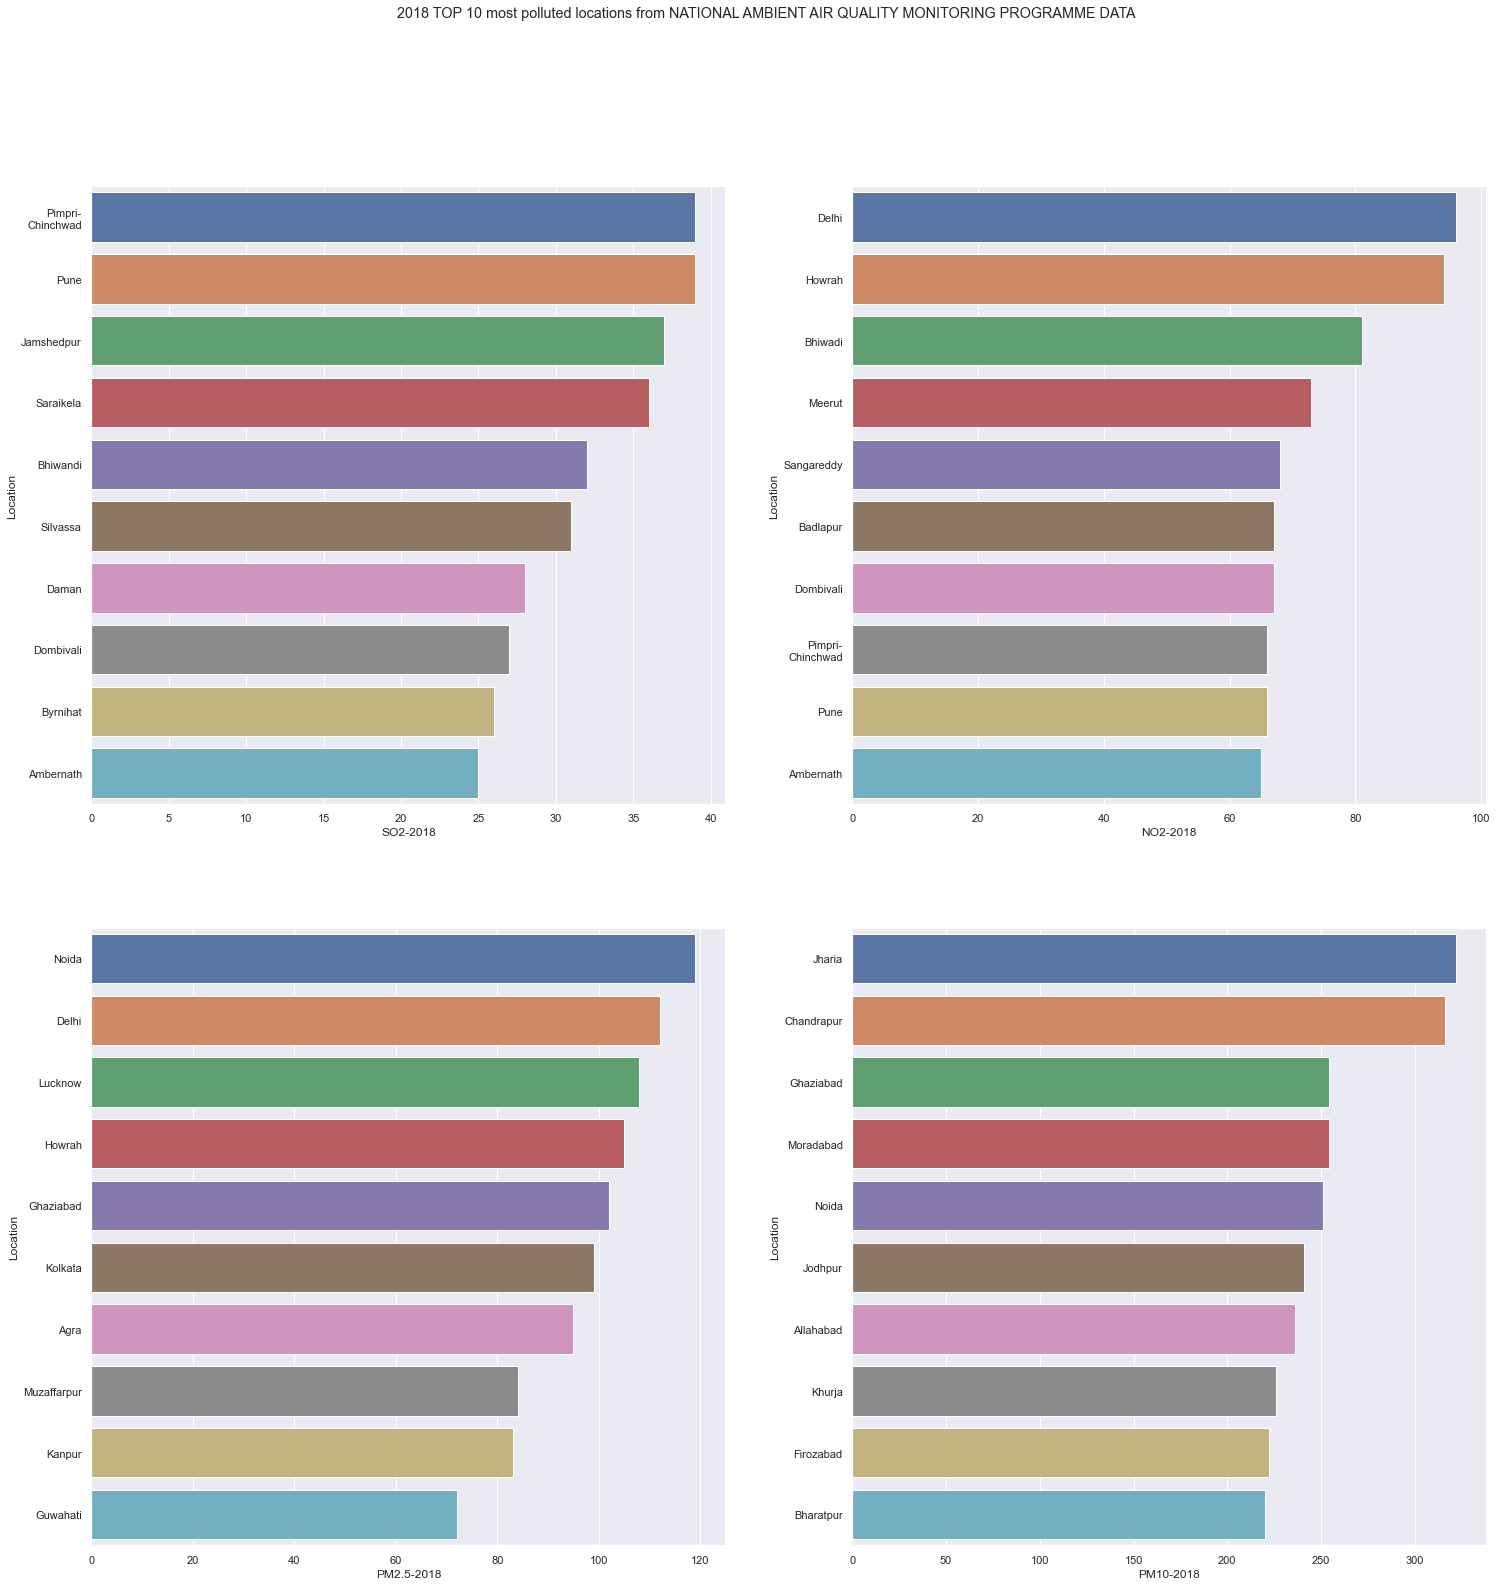

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(25,25))
fig.suptitle('2018 TOP 10 most polluted locations from NATIONAL AMBIENT AIR QUALITY MONITORING PROGRAMME DATA')
sns.barplot(ax=axes[0,0], x=df_2018_SO2['SO2-2018'], y=df_2018_SO2.Location)
sns.barplot(ax=axes[0,1], x=df_2018_NO2['NO2-2018'], y=df_2018_NO2.Location)
sns.barplot(ax=axes[1,0], x=df_2018_PM2_5['PM2.5-2018'], y=df_2018_PM2_5.Location)
sns.barplot(ax=axes[1,1], x=df_2018_PM10['PM10-2018'], y=df_2018_PM10.Location)

<AxesSubplot:xlabel='PM10-2019', ylabel='Location'>

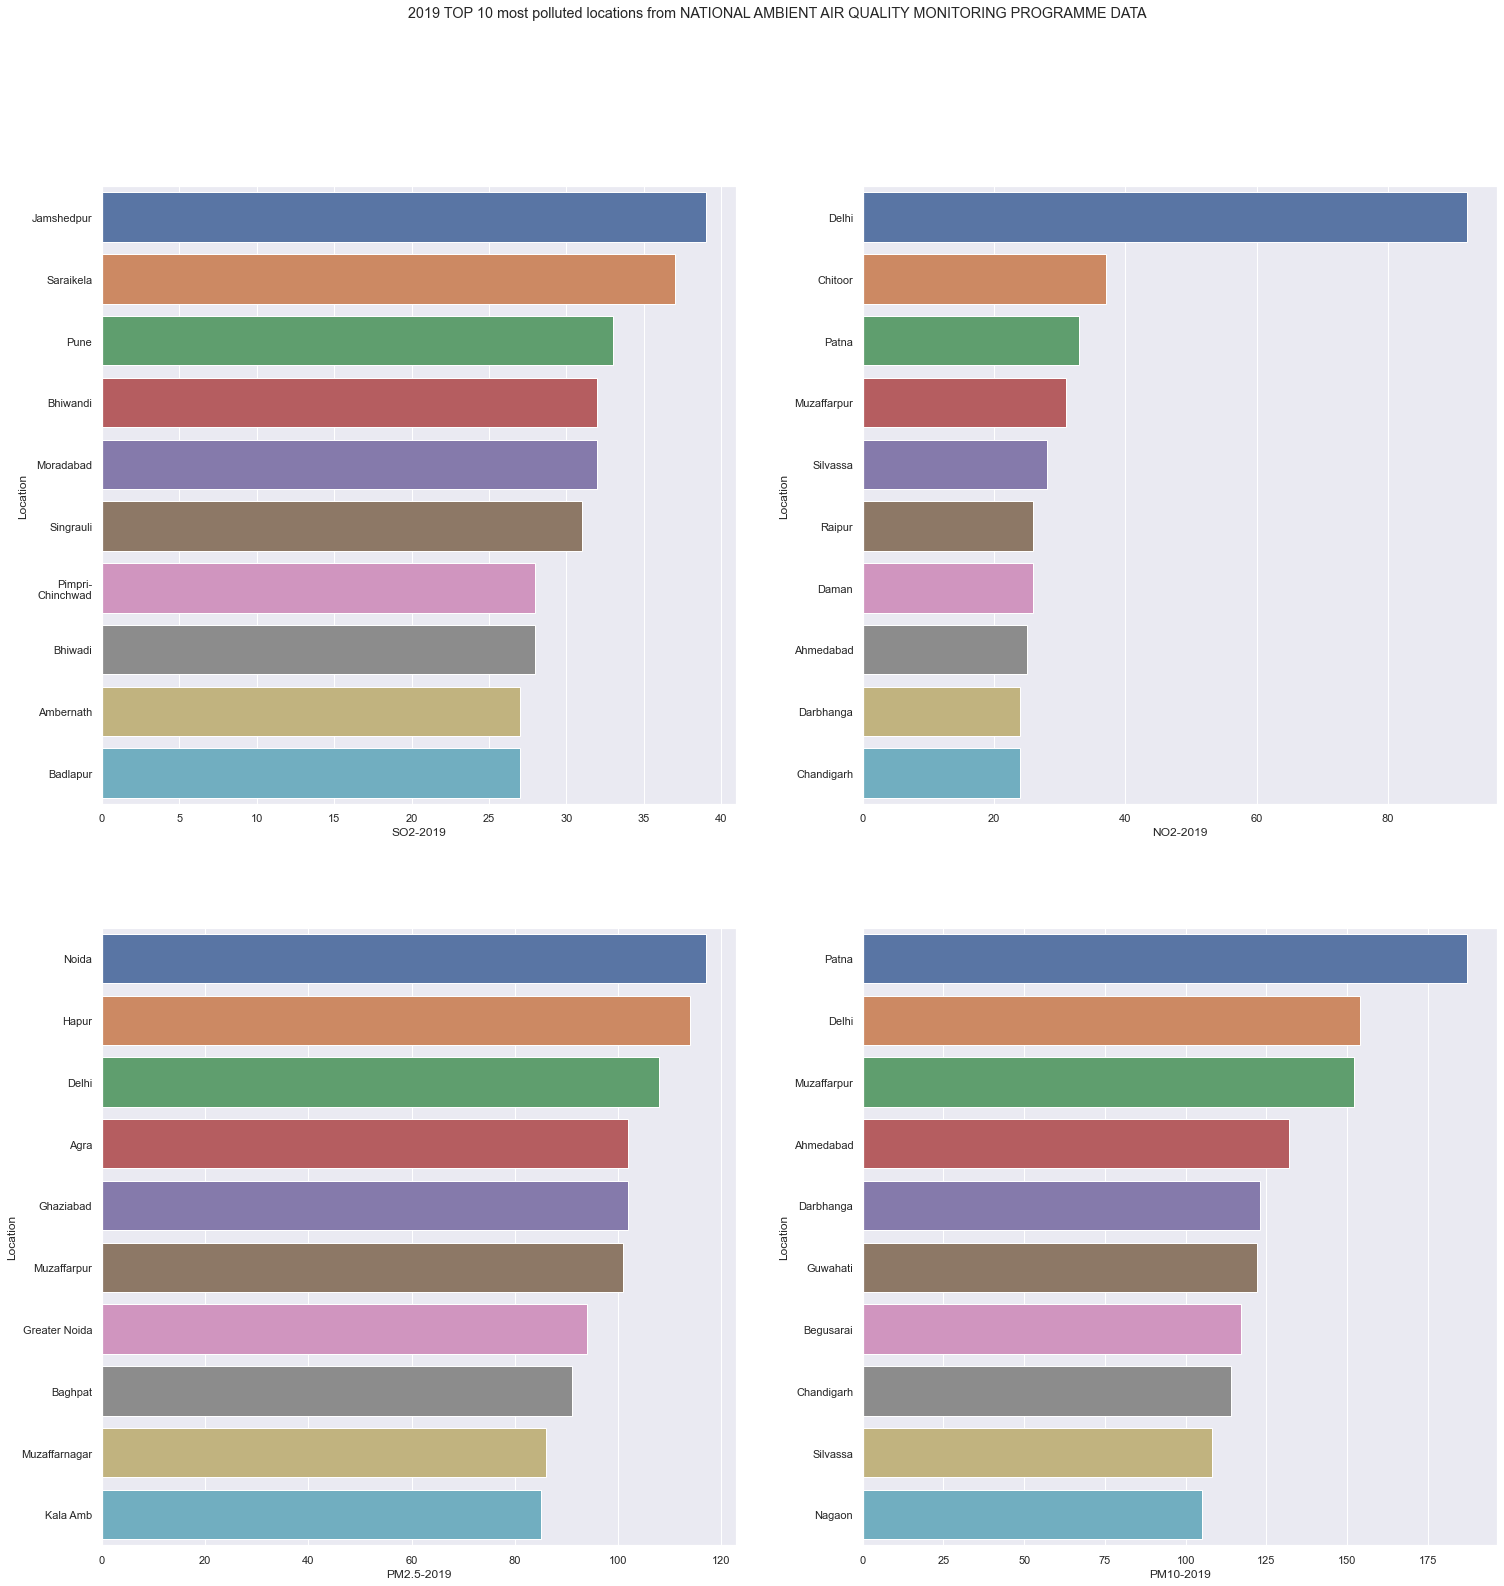

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(25,25))
fig.suptitle('2019 TOP 10 most polluted locations from NATIONAL AMBIENT AIR QUALITY MONITORING PROGRAMME DATA')
sns.barplot(ax=axes[0,0], x=df_2019_SO2['SO2-2019'], y=df_2019_SO2.Location)
sns.barplot(ax=axes[0,1], x=df_2019_NO2['NO2-2019'], y=df_2019_NO2.Location)
sns.barplot(ax=axes[1,0], x=df_2019_PM2_5['PM2.5-2019'], y=df_2019_PM2_5.Location)
sns.barplot(ax=axes[1,1], x=df_2019_PM10['PM10-2019'], y=df_2019_PM10.Location)

<AxesSubplot:xlabel='PM10-2020', ylabel='Location'>

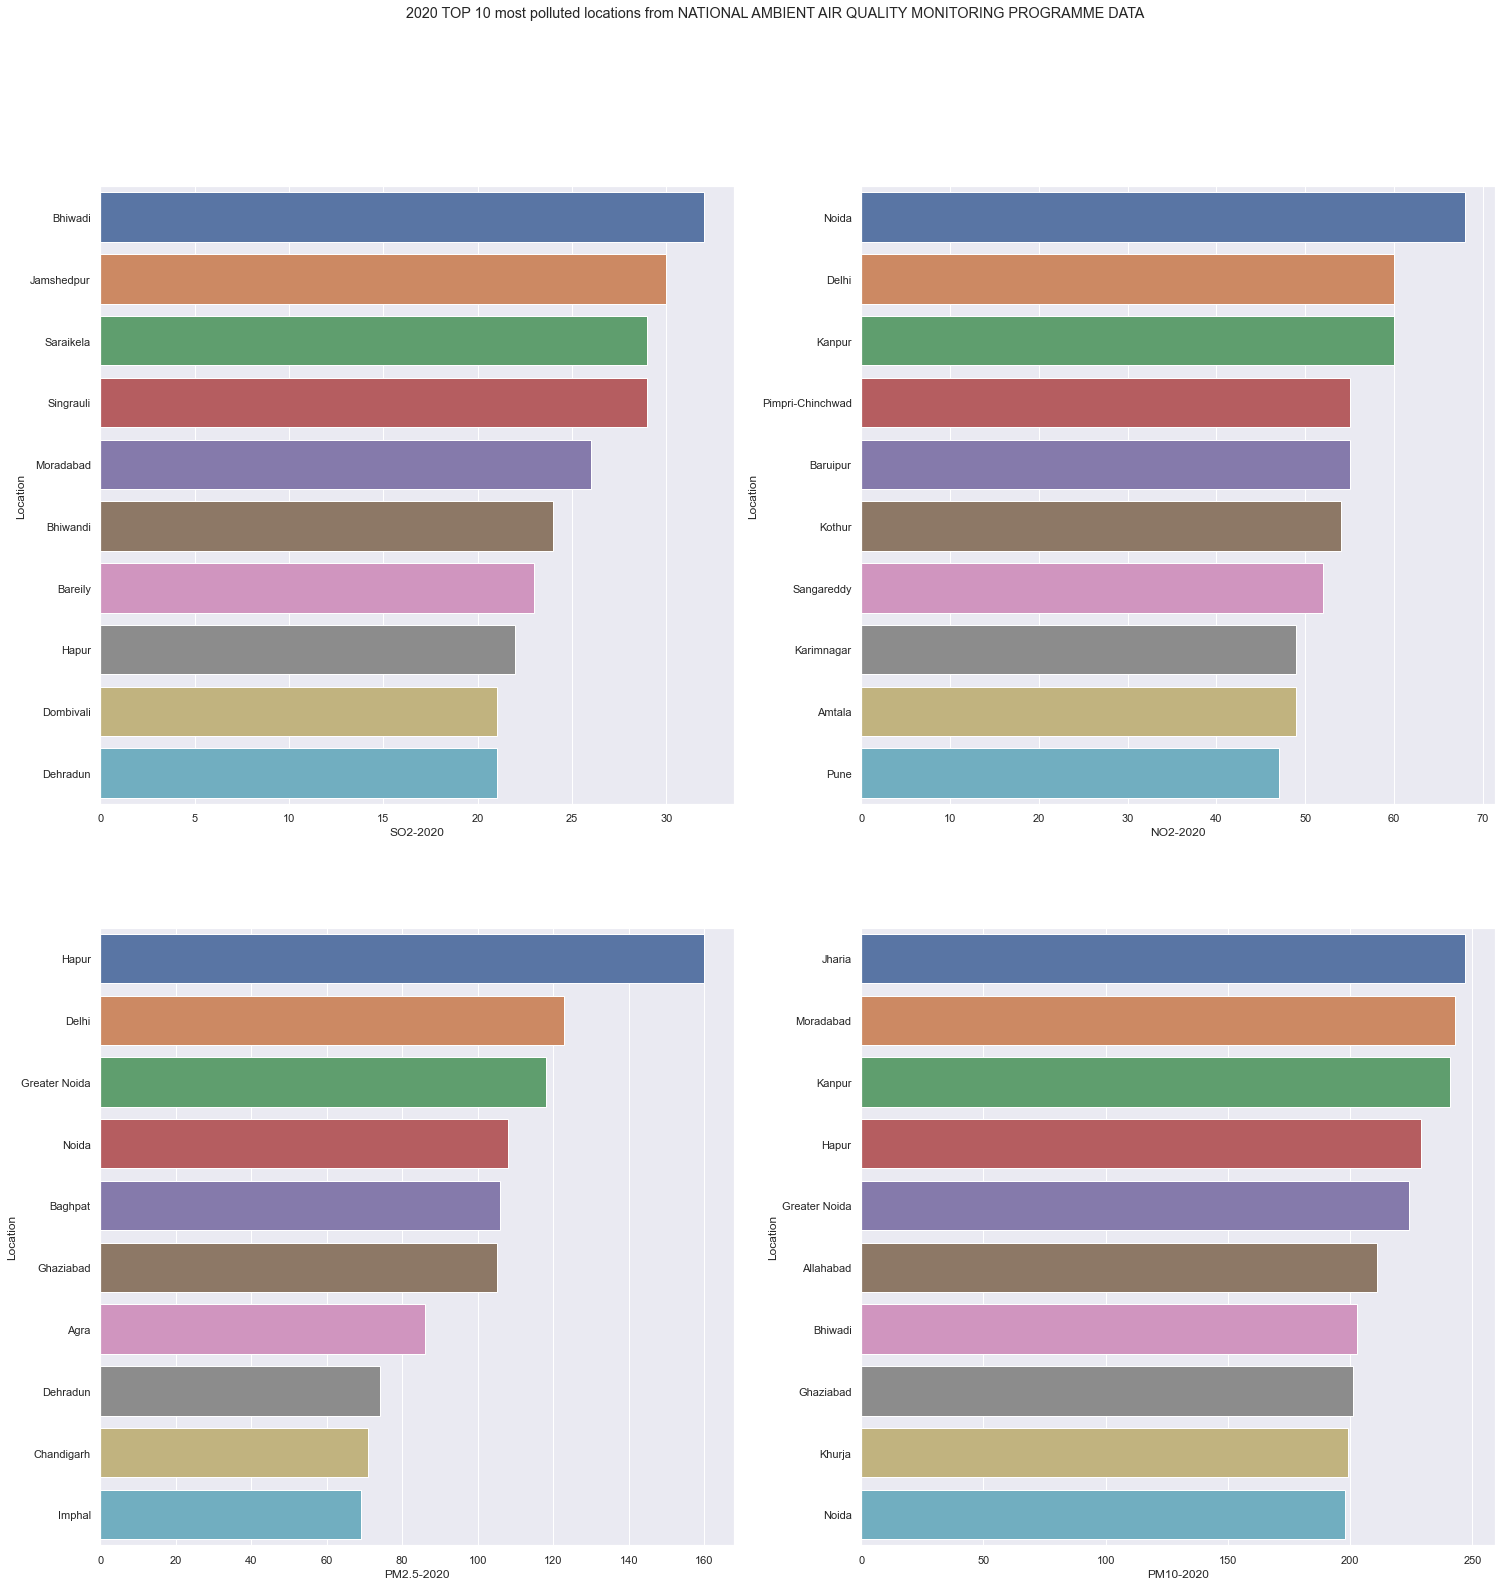

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(25,25))
fig.suptitle('2020 TOP 10 most polluted locations from NATIONAL AMBIENT AIR QUALITY MONITORING PROGRAMME DATA')
sns.barplot(ax=axes[0,0], x=df_2020_SO2['SO2-2020'], y=df_2020_SO2.Location)
sns.barplot(ax=axes[0,1], x=df_2020_NO2['NO2-2020'], y=df_2020_NO2.Location)
sns.barplot(ax=axes[1,0], x=df_2020_PM2_5['PM2.5-2020'], y=df_2020_PM2_5.Location)
sns.barplot(ax=axes[1,1], x=df_2020_PM10['PM10-2020'], y=df_2020_PM10.Location)

## Coal data univariate analysis

In [53]:
df_Coal_datafile = pd.read_csv("Coal_datafile.csv")
df_Coal_datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2015    1 non-null      float64
 1   2016    1 non-null      float64
 2   2017    1 non-null      float64
 3   2018    1 non-null      float64
 4   2019    1 non-null      float64
 5   2020    1 non-null      float64
dtypes: float64(6)
memory usage: 176.0 bytes


In [54]:
df_Coal_datafile

,2015,2016,2017,2018,2019,2020
0,761.66,836.73,837.22,898.52,968.25,954.72


<AxesSubplot:>

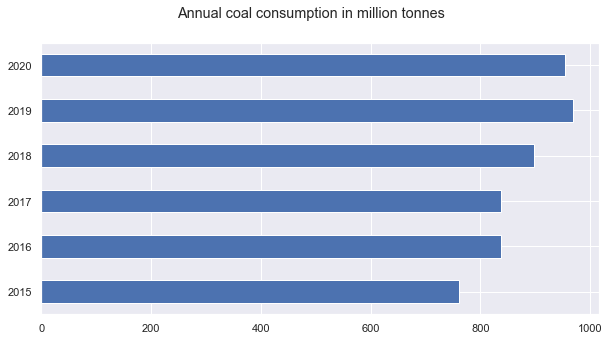

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Annual coal consumption in million tonnes')
df_Coal_datafile.iloc[0].plot.barh()

In [56]:
df_Petro_datafile = pd.read_csv("All_India_Petro_PRODUCTS_SALES-STATE-WISE.csv")

In [57]:
df_Petro_datafile

,2015,2016,2017,2018,2019,2020
0,165653.3193,171225.3856,181126.4619,190351.9038,190626.6512,172609.9693


In [58]:
df_Petro_datafile.round(2)

,2015,2016,2017,2018,2019,2020
0,165653.32,171225.39,181126.46,190351.9,190626.65,172609.97


<AxesSubplot:>

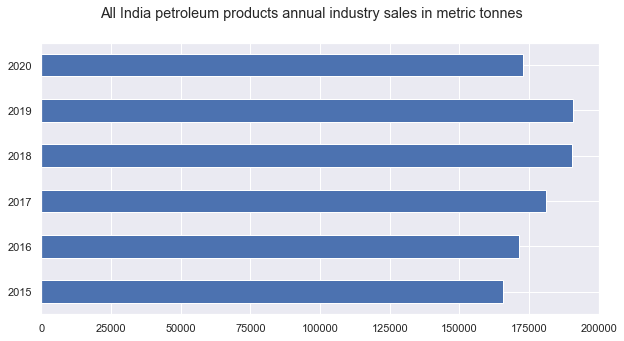

In [59]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('All India petroleum products annual industry sales in metric tonnes')
df_Petro_datafile.iloc[0].plot.barh()

## Target columns are significant 10 locations for SO2, NO2 and PM10 concentration.
 - Prepare the data set for modeling technique.
 - If the value is above the limit, target column is 0 - unhealthy
 - If the value is less than or equal to the limit, target column is 1 - healthy. 
 - 60 µg/m3 for NO2
 - 30 µg/m3 for SO2
 - 200 µg/m3 for PM10

In [60]:
df_NO2 = pd.read_csv("merged-NO2.csv")

In [61]:
df_NO2

,Location,NO2-2015,NO2-2016,NO2-2017,NO2-2018,NO2-2019,NO2-2020
0,Delhi,89,91,97,97,98,70
1,Jamshedpur,45,45,45,46,48,37
2,Thane,58,63,49,50,37,29
3,Barrackpore,58,58,48,50,28,19
4,Chennai,22,23,21,20,21,19
5,Badlapur,55,72,68,67,60,38
6,Asansol,55,43,37,35,44,32
7,Durgapur,55,43,37,35,44,32
8,Dombivali/Ambernath,54,77,69,67,60,44
9,Pune,54,69,32,76,87,56


In [62]:
# create an Empty DataFrame object
df = pd.DataFrame()

In [63]:
# Delhi
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Delhi = [89,91,97,97,98,70] 
df_1 = pd.DataFrame()
df_1["Year"] = Year
df_1["Location_val"] = Location_val_Delhi

In [64]:
#Jamshedpur
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Jamshedpur = [45,45,45,46,48,37]
df_2 = pd.DataFrame()
df_2["Year"] = Year
df_2["Location_val"] = Location_val_Jamshedpur

In [65]:
#Thane
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Thane = [58,63,49,50,37,29]
df_3 = pd.DataFrame()
df_3["Year"] = [2015,2016,2017,2018,2019,2020]
df_3["Location_val"] = Location_val_Thane

In [66]:
#Barrackpore
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Barrackpore = [58,58,48,50,28,19]
df_4 = pd.DataFrame()
df_4["Year"] = [2015,2016,2017,2018,2019,2020]
df_4["Location_val"] = Location_val_Barrackpore

In [67]:
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Chennai = [22,23,21,20,21,19]
df_5 = pd.DataFrame()
df_5["Year"] = [2015,2016,2017,2018,2019,2020]
df_5["Location_val"] = Location_val_Chennai

In [68]:
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Badlapur = [55,72,68,67,60,38]
df_6 = pd.DataFrame()
df_6["Year"] = [2015,2016,2017,2018,2019,2020]
df_6["Location_val"] = Location_val_Badlapur

In [69]:
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Asansol = [55,43,37,35,44,32]
df_7 = pd.DataFrame()
df_7["Year"] = [2015,2016,2017,2018,2019,2020]
df_7["Location_val"] = Location_val_Asansol

In [70]:
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Durgapur = [55,43,37,35,44,32]
df_8 = pd.DataFrame()
df_8["Year"] = [2015,2016,2017,2018,2019,2020]
df_8["Location_val"] = Location_val_Durgapur

In [71]:
Location_val_Dombivali_Ambernath = [54,77,69,67,60,44]
df_9 = pd.DataFrame()
df_9["Year"] = [2015,2016,2017,2018,2019,2020]
df_9["Location_val"] = Location_val_Dombivali_Ambernath

In [72]:
Location_val_Pune = [54,69,32,76,87,56]
df_10 = pd.DataFrame()
df_10["Year"] = [2015,2016,2017,2018,2019,2020]
df_10["Location_val"] = Location_val_Pune

In [73]:
# merge
Merge_df = pd.concat([df_1, df_2, df_3, df_4, df_5,df_6,df_7,df_8,df_9,df_10], axis = 0)

In [74]:
Merge_df.shape

(60, 2)

In [75]:
Merge_df.reset_index(drop = True)

,Year,Location_val
0,2015,89
1,2016,91
2,2017,97
3,2018,97
4,2019,98
5,2020,70
6,2015,45
7,2016,45
8,2017,45
9,2018,46


In [76]:
df_Petroleum_Consumption

,Products,2015,2016,2017,2018,2019,2020
0,LPG,19623.3,21608.2,23341.82,24906.8,26329.78,27558.43
1,Naphtha,13270.9,13240.8,12888.61,14131.2,14267.78,14100.36
2,MS,21846.5,23764.8,26174.48,28284.3,29975.49,27968.99
3,ATF,6261.9,6997.6,7632.68,8300.0,7998.61,3697.75
4,SKO,6826.4,5396.7,3845.12,3459.5,2396.82,1797.87
5,HSD,74647.0,76026.8,81073.44,83528.2,82602.01,72712.73
6,LDO,407.2,449.0,523.79,598.1,627.80,855.06
7,Lubricants & Greases,3571.2,3470.1,3883.88,3667.9,3833.39,4097.30
8,FO & LSHS,6632.1,7150.4,6720.97,6563.5,6301.54,5586.48
9,Bitumen,5937.9,5935.4,6085.85,6707.6,6720.37,7523.92


In [77]:
df_Petroleum_Consumption_T = pd.read_csv("Petroleum_Consumption_T.csv")

In [78]:
df_Petroleum_Consumption_T

,Year,LPG,Naphtha,MS,ATF,SKO,HSD,LDO,Lubricants & Greases,FO & LSHS,Bitumen,Petroleum coke,Others,Total
0,2015,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
1,2016,21608.20000,13240.80000,23764.80000,6997.600000,5396.700000,76026.80000,449.000000,3470.100000,7150.400000,5935.400000,23964.00000,6593.40000,194597.2000
2,2017,23341.82104,12888.60699,26174.47836,7632.684400,3845.118110,81073.43646,523.787520,3883.883312,6720.972040,6085.851527,25656.72872,8338.79836,206166.1668
3,2018,24906.80000,14131.20000,28284.30000,8300.000000,3459.500000,83528.20000,598.100000,3667.900000,6563.500000,6707.600000,21346.00000,11723.20000,213216.3000
4,2019,26329.78000,14267.77878,29975.48841,7998.609036,2396.824502,82602.01251,627.799545,3833.387782,6301.539119,6720.368850,21708.15883,11364.87910,214126.6264
5,2020,27558.42647,14100.35545,27968.99371,3697.754979,1797.871249,72712.72631,855.064224,4097.298153,5586.481640,7523.915390,15605.15257,12791.28092,194295.3211


In [79]:
Merge_df.shape

(60, 2)

### Merging Merge_df and df_Petroleum_Consumption_T on Year column

In [80]:
prepared_df_NO2 = Merge_df.merge(df_Petroleum_Consumption_T, on = 'Year')

In [81]:
prepared_df_NO2.rename(columns={"Location_val": "SO2_val"})

,Year,SO2_val,LPG,Naphtha,MS,ATF,SKO,HSD,LDO,Lubricants & Greases,FO & LSHS,Bitumen,Petroleum coke,Others,Total
0,2015,89,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
1,2015,45,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
2,2015,58,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
3,2015,58,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
4,2015,22,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
5,2015,55,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
6,2015,55,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
7,2015,55,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
8,2015,54,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
9,2015,54,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000


In [82]:
prepared_df_NO2.shape

(60, 15)

### Removing columns ['LPG', 'Lubricants & Greases', 'FO & LSHS', 'Bitumen',Others','Total' ]
  - LPG is cooking gas
  - Bituminous materials are used for road construction, roofing, waterproofing, and other applications
  - FO / LSHS is  a fuel in Power, Fertilizer, petrochemicals and steel sectors and some of the fertilizers.
  - Petroleum coke is a valuable and essential commercial product that is used directly in aluminum manufacturing, fuels,steel, glass, paint, and fertilizers.

In [83]:
prepared_df_NO2.drop(columns = ['LPG', 'Lubricants & Greases', 'FO & LSHS', 'Bitumen','Others','Total' , 'Petroleum coke'], axis =1, inplace = True)

In [84]:
prepared_df_NO2

,Year,Location_val,Naphtha,MS,ATF,SKO,HSD,LDO
0,2015,89,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
1,2015,45,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
2,2015,58,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
3,2015,58,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
4,2015,22,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
5,2015,55,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
6,2015,55,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
7,2015,55,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
8,2015,54,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
9,2015,54,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000


In [85]:
Coal_datafile_T = pd.read_csv("Coal_datafile_T.csv")

In [86]:
Coal_datafile_T

,Year,Coal-Consumption
0,2015,761.66
1,2016,836.73
2,2017,837.22
3,2018,898.52
4,2019,968.25
5,2020,954.72


### Merge prepared_df_NO2 with coal data frame on year

In [87]:
prepared_df_NO2 = prepared_df_NO2.merge(Coal_datafile_T, on = 'Year')

In [88]:
prepared_df_NO2

,Year,Location_val,Naphtha,MS,ATF,SKO,HSD,LDO,Coal-Consumption
0,2015,89,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
1,2015,45,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
2,2015,58,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
3,2015,58,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
4,2015,22,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
5,2015,55,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
6,2015,55,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
7,2015,55,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
8,2015,54,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
9,2015,54,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66


In [89]:
prepared_df_NO2.shape

(60, 9)

### Merge prepared_df_NO2 with gdp growth on year

In [90]:
df_gdp = pd.read_csv("GDP_growth.csv")

In [91]:
df_gdp

,Year,GDP-growth
0,2015,8.00
1,2016,8.26
2,2017,6.80
3,2018,6.53
4,2019,4.04
5,2020,-7.25


In [92]:
prepared_df_NO2_final = prepared_df_NO2.merge(df_gdp, on = 'Year')

In [93]:
prepared_df_NO2_final.shape

(60, 10)

In [94]:
prepared_df_NO2_final

,Year,Location_val,Naphtha,MS,ATF,SKO,HSD,LDO,Coal-Consumption,GDP-growth
0,2015,89,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
1,2015,45,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
2,2015,58,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
3,2015,58,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
4,2015,22,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
5,2015,55,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
6,2015,55,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
7,2015,55,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
8,2015,54,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
9,2015,54,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00


In [95]:
#If the value is less than or equal to the limit, target column is 1 healthy.
#60 µg/m3 limit for NO2
prepared_df_NO2_final.Location_val = prepared_df_NO2_final.Location_val.apply(lambda cell_value : 1 if cell_value <= 60.0 else 0 )

In [96]:
prepared_df_NO2_final

,Year,Location_val,Naphtha,MS,ATF,SKO,HSD,LDO,Coal-Consumption,GDP-growth
0,2015,0,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
1,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
2,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
3,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
4,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
5,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
6,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
7,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
8,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
9,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00


In [97]:
# create an Empty DataFrame object
df_SO2_1 = pd.DataFrame()

In [98]:
df_SO2 = pd.read_csv("merged-SO2.csv")

In [99]:
df_SO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  10 non-null     object
 1   SO2-2015  10 non-null     int64 
 2   SO2-2016  10 non-null     int64 
 3   SO2-2017  10 non-null     int64 
 4   SO2-2018  10 non-null     int64 
 5   SO2-2019  10 non-null     int64 
 6   SO2-2020  10 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 688.0+ bytes


In [100]:
df_SO2

,Location,SO2-2015,SO2-2016,SO2-2017,SO2-2018,SO2-2019,SO2-2020
0,Saraikela Kharsawan,36,37,35,36,37,29
1,Jamshedpur,34,36,36,37,38,30
2,Nagda,30,27,25,20,14,12
3,Thane,28,20,24,18,20,19
4,Pune,27,36,22,39,37,15
5,Dehradun,26,26,27,28,26,21
6,Byrnihat,25,42,35,26,15,26
7,Rishikesh,25,23,22,21,22,20
8,Ghaziabad,24,15,24,22,15,11
9,Navi Mumbai,20,22,23,48,18,14


In [101]:
# Location_val_Saraikela
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Saraikela  = [36,37,35,36,37,29] 
df_SO2_1 = pd.DataFrame()
df_SO2_1["Year"] = Year
df_SO2_1["Location_val"] = Location_val_Saraikela

In [102]:
# Location_val_Jamshedpur
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Jamshedpur  = [34,36,36,37,38,30] 
df_SO2_2 = pd.DataFrame()
df_SO2_2["Year"] = Year
df_SO2_2["Location_val"] = Location_val_Jamshedpur

In [103]:
# Location_val_Nagda
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Nagda  = [30,27,25,20,14,12]
df_SO2_3 = pd.DataFrame()
df_SO2_3["Year"] = Year
df_SO2_3["Location_val"] = Location_val_Nagda

In [104]:
# Location_val_Thane
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Thane  = [28,20,24,18,20,19]
df_SO2_4 = pd.DataFrame()
df_SO2_4["Year"] = Year
df_SO2_4["Location_val"] = Location_val_Thane

In [105]:
# Location_val_Pune
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Pune  = [27,36,22,39,37,15]
df_SO2_5 = pd.DataFrame()
df_SO2_5["Year"] = Year
df_SO2_5["Location_val"] = Location_val_Pune

In [106]:
# Location_val_Dehradun
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Dehradun  = [26,26,27,28,26,21]
df_SO2_6 = pd.DataFrame()
df_SO2_6["Year"] = Year
df_SO2_6["Location_val"] = Location_val_Dehradun

In [107]:
# Location_val_Byrnihat
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Byrnihat  = [25,42,35,26,15,26]
df_SO2_7 = pd.DataFrame()
df_SO2_7["Year"] = Year
df_SO2_7["Location_val"] = Location_val_Byrnihat

In [108]:
# Location_val_Byrnihat
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Byrnihat  = [25,42,35,26,15,26]
df_SO2_7 = pd.DataFrame()
df_SO2_7["Year"] = Year
df_SO2_7["Location_val"] = Location_val_Byrnihat

In [109]:
# Location_val_Rishikesh
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Rishikesh  = [25,23,22,21,22,20]
df_SO2_8 = pd.DataFrame()
df_SO2_8["Year"] = Year
df_SO2_8["Location_val"] = Location_val_Rishikesh

In [110]:
# Location_val_Ghaziabad
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Ghaziabad  = [24,15,24,22,15,11]
df_SO2_9 = pd.DataFrame()
df_SO2_9["Year"] = Year
df_SO2_9["Location_val"] = Location_val_Ghaziabad

In [111]:
# Location_val_Navi_Mumbai
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Navi_Mumbai  = [20,22,23,48,18,14]
df_SO2_10 = pd.DataFrame()
df_SO2_10["Year"] = Year
df_SO2_10["Location_val"] = Location_val_Navi_Mumbai

In [112]:
# merge
Merge_SO2_df = pd.concat([df_SO2_1, df_SO2_2, df_SO2_3, df_SO2_4, df_SO2_5,df_SO2_6,df_SO2_7,df_SO2_8,df_SO2_9,df_SO2_10], axis = 0)

In [113]:
Merge_SO2_df

,Year,Location_val
0,2015,36
1,2016,37
2,2017,35
3,2018,36
4,2019,37
5,2020,29
0,2015,34
1,2016,36
2,2017,36
3,2018,37


In [114]:
# reset index
Merge_SO2_df.reset_index(drop = True, inplace = True)

### Merge with df_Petroleum_Consumption_T

In [115]:
prepared_df_SO2 = Merge_SO2_df.merge(df_Petroleum_Consumption_T, on = 'Year')

In [116]:
prepared_df_SO2

,Year,Location_val,LPG,Naphtha,MS,ATF,SKO,HSD,LDO,Lubricants & Greases,FO & LSHS,Bitumen,Petroleum coke,Others,Total
0,2015,36,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
1,2015,34,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
2,2015,30,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
3,2015,28,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
4,2015,27,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
5,2015,26,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
6,2015,25,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
7,2015,25,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
8,2015,24,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
9,2015,20,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000


In [117]:
prepared_df_SO2.shape

(60, 15)

### Merge woth coal data frame

In [118]:
prepared_df_SO2 = prepared_df_SO2.merge(Coal_datafile_T, on = 'Year')

In [119]:
prepared_df_SO2.shape

(60, 16)

In [120]:
prepared_df_SO2

,Year,Location_val,LPG,Naphtha,MS,ATF,SKO,HSD,LDO,Lubricants & Greases,FO & LSHS,Bitumen,Petroleum coke,Others,Total,Coal-Consumption
0,2015,36,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000,761.66
1,2015,34,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000,761.66
2,2015,30,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000,761.66
3,2015,28,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000,761.66
4,2015,27,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000,761.66
5,2015,26,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000,761.66
6,2015,25,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000,761.66
7,2015,25,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000,761.66
8,2015,24,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000,761.66
9,2015,20,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000,761.66


In [121]:
prepared_df_SO2.drop(columns = ['LPG', 'Lubricants & Greases', 'FO & LSHS', 'Bitumen','Others','Total' , 'Petroleum coke'], axis =1, inplace = True)

In [122]:
prepared_df_SO2

,Year,Location_val,Naphtha,MS,ATF,SKO,HSD,LDO,Coal-Consumption
0,2015,36,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
1,2015,34,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
2,2015,30,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
3,2015,28,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
4,2015,27,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
5,2015,26,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
6,2015,25,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
7,2015,25,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
8,2015,24,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
9,2015,20,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66


In [123]:
prepared_df_SO2.shape

(60, 9)

### Merge on Year with gdp growth

In [124]:
prepared_df_SO2_final = prepared_df_SO2.merge(df_gdp, on = 'Year')

In [125]:
prepared_df_SO2_final.shape

(60, 10)

In [126]:
prepared_df_SO2_final

,Year,Location_val,Naphtha,MS,ATF,SKO,HSD,LDO,Coal-Consumption,GDP-growth
0,2015,36,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
1,2015,34,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
2,2015,30,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
3,2015,28,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
4,2015,27,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
5,2015,26,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
6,2015,25,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
7,2015,25,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
8,2015,24,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
9,2015,20,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00


In [127]:
#If the value is less than or equal to the limit, target column is 1 for healthy.
#30 µg/m3 limit for NO2
prepared_df_SO2_final.Location_val = prepared_df_SO2_final.Location_val.apply(lambda cell_value : 1 if cell_value <= 30.0 else 0 )

In [128]:
prepared_df_SO2_final

,Year,Location_val,Naphtha,MS,ATF,SKO,HSD,LDO,Coal-Consumption,GDP-growth
0,2015,0,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
1,2015,0,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
2,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
3,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
4,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
5,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
6,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
7,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
8,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
9,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00


In [129]:
df_PM10 = pd.read_csv("merged-PM10.csv")

In [130]:
df_PM10

,Location,PM10-2015,PM10-2016,PM10-2017,PM10-2018,PM10-2019,PM10-2020
0,Allahabad,270,198,258,236,230,180
1,Ghaziabad,270,223,275,236,200,200
2,Jharia,231,280,295,322,302,247
3,Bangalore,135,114,112,107,90,68
4,Ranchi,220,196,142,122,109,106
5,Bareily,209,229,207,199,163,180
6,Kanpur,201,244,238,238,210,192
7,Moradabad,195,172,250,254,220,216
8,Firozabad,192,222,257,223,220,180
9,Amritsar,185,225,195,176,160,165


In [131]:
# Location_val_Allahabad
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Allahabad  = [270,198,258,236,230,180]
df_PM10_1 = pd.DataFrame()
df_PM10_1["Year"] = Year
df_PM10_1["Location_val"] = Location_val_Allahabad

In [132]:
# Location_val_Ghaziabad
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Ghaziabad  = [270,223,275,236,200,200]
df_PM10_2 = pd.DataFrame()
df_PM10_2["Year"] = Year
df_PM10_2["Location_val"] = Location_val_Ghaziabad

In [133]:
# Location_val_Jharia
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Jharia  = [231,280,295,322,302,247]
df_PM10_3 = pd.DataFrame()
df_PM10_3["Year"] = Year
df_PM10_3["Location_val"] = Location_val_Jharia

In [134]:
# Location_val_Bangalore
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Bangalore  = [135,114,112,107,90,68]
df_PM10_4 = pd.DataFrame()
df_PM10_4["Year"] = Year
df_PM10_4["Location_val"] = Location_val_Bangalore

In [135]:
# Location_val_Ranchi
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Ranchi  = [220,196,142,122,109,106]
df_PM10_5 = pd.DataFrame()
df_PM10_5["Year"] = Year
df_PM10_5["Location_val"] = Location_val_Ranchi

In [136]:
# Location_val_Bareily
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Bareily  = [209,229,207,199,163,180]
df_PM10_6 = pd.DataFrame()
df_PM10_6["Year"] = Year
df_PM10_6["Location_val"] = Location_val_Bareily

In [137]:
# Location_val_Kanpur
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Kanpur  = [201,244,238,238,210,192]
df_PM10_7 = pd.DataFrame()
df_PM10_7["Year"] = Year
df_PM10_7["Location_val"] = Location_val_Kanpur

In [138]:
# Location_val_Moradabad
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Moradabad  = [195,172,250,254,220,216]
df_PM10_8 = pd.DataFrame()
df_PM10_8["Year"] = Year
df_PM10_8["Location_val"] = Location_val_Moradabad

In [139]:
# Location_val_Firozabad
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Firozabad  = [192,222,257,223,220,180]
df_PM10_9 = pd.DataFrame()
df_PM10_9["Year"] = Year
df_PM10_9["Location_val"] = Location_val_Firozabad

In [140]:
# Location_val_Amritsar
Year = [2015,2016,2017,2018,2019,2020]
Location_val_Amritsar  = [185,225,195,176,160,165]
df_PM10_10 = pd.DataFrame()
df_PM10_10["Year"] = Year
df_PM10_10["Location_val"] = Location_val_Amritsar

In [141]:
# merge
prepared_df_PM10 = pd.concat([df_PM10_1, df_PM10_2, df_PM10_3, df_PM10_4, df_PM10_5,df_PM10_6,df_PM10_7,df_PM10_8,df_PM10_9,df_PM10_10], axis = 0)

In [142]:
prepared_df_PM10.reset_index(drop = True, inplace = True)

In [143]:
prepared_df_PM10

,Year,Location_val
0,2015,270
1,2016,198
2,2017,258
3,2018,236
4,2019,230
5,2020,180
6,2015,270
7,2016,223
8,2017,275
9,2018,236


In [144]:
prepared_df_PM10 = prepared_df_PM10.merge(df_Petroleum_Consumption_T, on = 'Year')

In [145]:
prepared_df_PM10.shape

(60, 15)

In [146]:
prepared_df_PM10

,Year,Location_val,LPG,Naphtha,MS,ATF,SKO,HSD,LDO,Lubricants & Greases,FO & LSHS,Bitumen,Petroleum coke,Others,Total
0,2015,270,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
1,2015,270,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
2,2015,231,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
3,2015,135,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
4,2015,220,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
5,2015,209,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
6,2015,201,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
7,2015,195,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
8,2015,192,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000
9,2015,185,19623.30000,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,3571.200000,6632.100000,5937.900000,19297.40000,6352.30000,184674.1000


In [147]:
prepared_df_PM10.drop(columns = ['LPG', 'Lubricants & Greases', 'FO & LSHS', 'Bitumen','Others','Total' , 'Petroleum coke'], axis =1, inplace = True)

In [148]:
prepared_df_PM10

,Year,Location_val,Naphtha,MS,ATF,SKO,HSD,LDO
0,2015,270,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
1,2015,270,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
2,2015,231,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
3,2015,135,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
4,2015,220,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
5,2015,209,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
6,2015,201,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
7,2015,195,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
8,2015,192,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000
9,2015,185,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000


In [149]:
prepared_df_PM10.shape

(60, 8)

### Merge with coal dataframe

In [150]:
prepared_df_PM10 = prepared_df_PM10.merge(Coal_datafile_T, on = 'Year')

In [151]:
prepared_df_PM10

,Year,Location_val,Naphtha,MS,ATF,SKO,HSD,LDO,Coal-Consumption
0,2015,270,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
1,2015,270,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
2,2015,231,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
3,2015,135,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
4,2015,220,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
5,2015,209,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
6,2015,201,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
7,2015,195,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
8,2015,192,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66
9,2015,185,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66


### Merge with gdp growth on year

In [152]:
prepared_df_PM10_final = prepared_df_PM10.merge(df_gdp, on = 'Year')

In [153]:
prepared_df_PM10_final

,Year,Location_val,Naphtha,MS,ATF,SKO,HSD,LDO,Coal-Consumption,GDP-growth
0,2015,270,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
1,2015,270,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
2,2015,231,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
3,2015,135,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
4,2015,220,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
5,2015,209,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
6,2015,201,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
7,2015,195,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
8,2015,192,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
9,2015,185,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00


In [154]:
#If the value is less than or equal to the limit, target column is 1 for healthy.
#220 µg/m3 limit for PM10
prepared_df_PM10_final.Location_val = prepared_df_PM10_final.Location_val.apply(lambda cell_value : 1 if cell_value <= 220.0 else 0 )

### Concat row wise the all three final data frames after classification for healthy and unhealthy levels of concentration

In [155]:
prepared_df_PM10_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              60 non-null     int64  
 1   Location_val      60 non-null     int64  
 2   Naphtha           60 non-null     float64
 3   MS                60 non-null     float64
 4   ATF               60 non-null     float64
 5   SKO               60 non-null     float64
 6   HSD               60 non-null     float64
 7   LDO               60 non-null     float64
 8   Coal-Consumption  60 non-null     float64
 9   GDP-growth        60 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 5.2 KB


In [156]:
prepared_df_SO2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              60 non-null     int64  
 1   Location_val      60 non-null     int64  
 2   Naphtha           60 non-null     float64
 3   MS                60 non-null     float64
 4   ATF               60 non-null     float64
 5   SKO               60 non-null     float64
 6   HSD               60 non-null     float64
 7   LDO               60 non-null     float64
 8   Coal-Consumption  60 non-null     float64
 9   GDP-growth        60 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 5.2 KB


In [157]:
prepared_df_NO2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              60 non-null     int64  
 1   Location_val      60 non-null     int64  
 2   Naphtha           60 non-null     float64
 3   MS                60 non-null     float64
 4   ATF               60 non-null     float64
 5   SKO               60 non-null     float64
 6   HSD               60 non-null     float64
 7   LDO               60 non-null     float64
 8   Coal-Consumption  60 non-null     float64
 9   GDP-growth        60 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 5.2 KB


In [158]:
# merge
Merged_final = pd.concat([prepared_df_PM10_final, prepared_df_SO2_final, prepared_df_NO2_final], axis = 0)

In [159]:
Merged_final.shape

(180, 10)

In [160]:
Merged_final.reset_index(drop = True, inplace = True)

In [161]:
Merged_final

,Year,Location_val,Naphtha,MS,ATF,SKO,HSD,LDO,Coal-Consumption,GDP-growth
0,2015,0,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
1,2015,0,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
2,2015,0,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
3,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
4,2015,1,13270.90000,21846.50000,6261.900000,6826.400000,74647.00000,407.200000,761.66,8.00
...,...,...,...,...,...,...,...,...,...,...
175,2020,1,14100.35545,27968.99371,3697.754979,1797.871249,72712.72631,855.064224,954.72,-7.25
176,2020,1,14100.35545,27968.99371,3697.754979,1797.871249,72712.72631,855.064224,954.72,-7.25
177,2020,1,14100.35545,27968.99371,3697.754979,1797.871249,72712.72631,855.064224,954.72,-7.25
178,2020,1,14100.35545,27968.99371,3697.754979,1797.871249,72712.72631,855.064224,954.72,-7.25


### Total 180 samples available 

### Check for null cells

In [162]:
Merged_final.isnull().sum()

Year                0
Location_val        0
Naphtha             0
MS                  0
ATF                 0
SKO                 0
HSD                 0
LDO                 0
Coal-Consumption    0
GDP-growth          0
dtype: int64

### Check for skewness

In [163]:
Merged_final.skew()

Year                0.000000
Location_val       -0.822900
Naphtha            -0.139065
MS                 -0.370007
ATF                -1.136600
SKO                 0.425769
HSD                -0.075031
LDO                 0.781973
Coal-Consumption   -0.154388
GDP-growth         -1.562337
dtype: float64

# Note! 
 - If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
 - If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
 - If the skewness is less than -1 or greater than 1, the data are highly skewed
###  going ahead with the skewness. Since they may be external factors for spike.

In [164]:
Merged_final = Merged_final.round(decimals = 2)

In [165]:
Merged_final

,Year,Location_val,Naphtha,MS,ATF,SKO,HSD,LDO,Coal-Consumption,GDP-growth
0,2015,0,13270.90,21846.50,6261.90,6826.40,74647.00,407.20,761.66,8.00
1,2015,0,13270.90,21846.50,6261.90,6826.40,74647.00,407.20,761.66,8.00
2,2015,0,13270.90,21846.50,6261.90,6826.40,74647.00,407.20,761.66,8.00
3,2015,1,13270.90,21846.50,6261.90,6826.40,74647.00,407.20,761.66,8.00
4,2015,1,13270.90,21846.50,6261.90,6826.40,74647.00,407.20,761.66,8.00
...,...,...,...,...,...,...,...,...,...,...
175,2020,1,14100.36,27968.99,3697.75,1797.87,72712.73,855.06,954.72,-7.25
176,2020,1,14100.36,27968.99,3697.75,1797.87,72712.73,855.06,954.72,-7.25
177,2020,1,14100.36,27968.99,3697.75,1797.87,72712.73,855.06,954.72,-7.25
178,2020,1,14100.36,27968.99,3697.75,1797.87,72712.73,855.06,954.72,-7.25


In [166]:
Temp_df =  Merged_final[["Year", "Location_val"]]

In [167]:
Temp_df = Temp_df.astype('Int64')

In [168]:
Temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Year          180 non-null    Int64
 1   Location_val  180 non-null    Int64
dtypes: Int64(2)
memory usage: 3.3 KB


<AxesSubplot:xlabel='Year', ylabel='Location_val'>

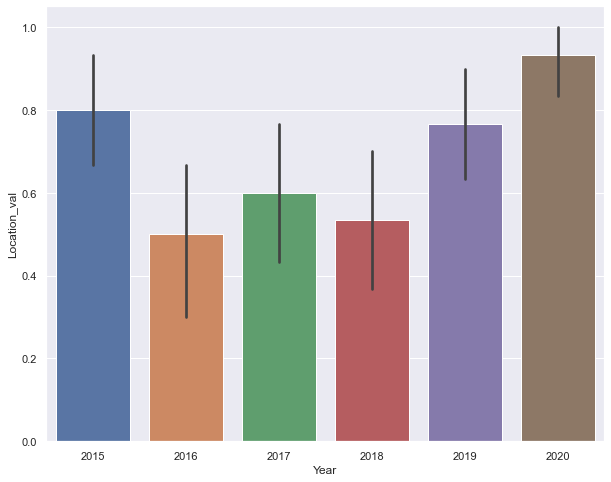

In [169]:
plt.figure(figsize=(10,8))
sns.barplot(x = "Year", y = "Location_val", data = Temp_df)

### Test-Train Split

In [170]:
# Putting feature variables to X
X = Merged_final.drop(['Year','Location_val'], axis=1)

X.shape

(180, 8)

In [171]:
# Putting response variable to y
y = Merged_final['Location_val']

y.shape

(180,)

### Model Building

In [172]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [173]:
scaler = StandardScaler()

X_train[['Naphtha','MS','ATF','SKO','HSD','LDO','Coal-Consumption','GDP-growth']] = scaler.fit_transform(X_train[['Naphtha','MS','ATF','SKO','HSD','LDO','Coal-Consumption','GDP-growth']])

X_train.head()

,Naphtha,MS,ATF,SKO,HSD,LDO,Coal-Consumption,GDP-growth
154,0.960865,0.762990,1.001996,-0.336264,1.307459,0.177822,0.355317,0.378731
140,-1.400586,0.008744,0.566258,-0.114808,0.707990,-0.322109,-0.491581,0.428384
12,-0.731275,-0.852700,0.151571,0.776241,-0.524434,-0.825270,-0.498351,0.696878
16,-0.731275,-0.852700,0.151571,0.776241,-0.524434,-0.825270,-0.498351,0.696878
117,0.902256,0.650269,-2.003123,-1.290513,-1.333752,1.906557,1.131755,-2.155411


In [174]:
y_train.head()

154    1
140    0
12     0
16     0
117    1
Name: Location_val, dtype: int64

In [175]:
columns_to_train = list(X_train.columns)

In [176]:
columns_to_train

['Naphtha', 'MS', 'ATF', 'SKO', 'HSD', 'LDO', 'Coal-Consumption', 'GDP-growth']

### Adding a ID column to train dataframe as a primary key indentifier for row

In [177]:
X_train['ID'] = X_train.index

In [178]:
X_train

,Naphtha,MS,ATF,SKO,HSD,LDO,Coal-Consumption,GDP-growth,ID
154,0.960865,0.762990,1.001996,-0.336264,1.307459,0.177822,0.355317,0.378731,154
140,-1.400586,0.008744,0.566258,-0.114808,0.707990,-0.322109,-0.491581,0.428384,140
12,-0.731275,-0.852700,0.151571,0.776241,-0.524434,-0.825270,-0.498351,0.696878,12
16,-0.731275,-0.852700,0.151571,0.776241,-0.524434,-0.825270,-0.498351,0.696878,16
117,0.902256,0.650269,-2.003123,-1.290513,-1.333752,1.906557,1.131755,-2.155411,117
...,...,...,...,...,...,...,...,...,...
79,-0.731275,-0.852700,0.151571,0.776241,-0.524434,-0.825270,-0.498351,0.696878,79
87,-1.400586,0.008744,0.566258,-0.114808,0.707990,-0.322109,-0.491581,0.428384,87
103,1.220425,1.367579,0.805198,-0.946545,1.081277,0.377633,1.318680,-0.079180,103
67,-0.674072,-1.538479,-0.328817,1.597297,-0.861390,-1.106485,-1.535490,0.649064,67


In [179]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[columns_to_train])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Location_val   No. Observations:                  125
Model:                            GLM   Df Residuals:                      119
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68.196
Date:                Sun, 06 Mar 2022   Deviance:                       136.39
Time:                        18:39:01   Pearson chi2:                     119.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9524      0.212      4.491      0.000       0.537       1.368
Naphtha              0.1423      0.313      0.454      0.650      -0.472       0.756
MS                   3.2321      1.332      2.426      0.015       0.621       5.844
ATF                 -1.9899      0.751     -2.651      0.008      -3.461      -0.519
SKO                  0.9776      0.431      2.266      0.023       0.132       1.823
HSD                  0.8751      0.511      1.714      0.087      -0.126       1.876
LDO                 -4.8551      2.074     -2.341      0.019      -8.920      -0.790
Coal-Consumption    -0.5427      0.576     -0.942      0.346      -1.672       0.586
GDP-growth          -3.2088      1.254     -2.559      0.010      -5.666      -0.751
====================================================================================
"""

In [180]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

154    0.526313
140    0.649762
12     0.532876
16     0.532876
117    0.856348
         ...   
79     0.532876
87     0.649762
103    0.841553
67     0.812853
24     0.649762
Length: 125, dtype: float64

In [181]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52631294, 0.64976246, 0.53287644, 0.53287644, 0.85634811,
       0.64976246, 0.53287644, 0.85634811, 0.84155315, 0.81285313])

### Creating a dataframe with the actual location val and the predicted probabilities
 - Adding a ID column to new dataframe as a primary key indentifier for row

In [182]:
y_train_pred_final = pd.DataFrame({'Actual_location_val':y_train.values, 'Val_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Actual_location_val,Val_Prob,ID
0,1,0.526313,154
1,0,0.649762,140
2,0,0.532876,12
3,0,0.532876,16
4,1,0.856348,117


In [183]:
y_train_pred_final.tail()

,Actual_location_val,Val_Prob,ID
120,1,0.532876,79
121,1,0.649762,87
122,1,0.841553,103
123,1,0.812853,67
124,1,0.649762,24


### Creating new column 'predicted' with 1 if Val_Prob > 0.5 else 0

In [184]:
y_train_pred_final['predicted_prob_0.5'] = y_train_pred_final.Val_Prob.map(lambda x: 1 if x > 0.50 else 0)

# Let's see the head
y_train_pred_final.head()

,Actual_location_val,Val_Prob,ID,predicted_prob_0.5
0,1,0.526313,154,1
1,0,0.649762,140,1
2,0,0.532876,12,1
3,0,0.532876,16,1
4,1,0.856348,117,1


In [185]:
# Let's see the tail
y_train_pred_final.tail()

,Actual_location_val,Val_Prob,ID,predicted_prob_0.5
120,1,0.532876,79,1
121,1,0.649762,87,1
122,1,0.841553,103,1
123,1,0.812853,67,1
124,1,0.649762,24,1


In [186]:
# Confusion matrix 
confusion_1 = metrics.confusion_matrix(y_train_pred_final.Actual_location_val, y_train_pred_final["predicted_prob_0.5"])
print(confusion_1)

[[ 0 36]
 [ 0 89]]


In [187]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Actual_location_val, y_train_pred_final["predicted_prob_0.5"]))

0.712


### Plotting the ROC Curve¶

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [188]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(12, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for 124 training samples at optimal probablity 0.6')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [189]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Actual_location_val, y_train_pred_final.Val_Prob, drop_intermediate = False )

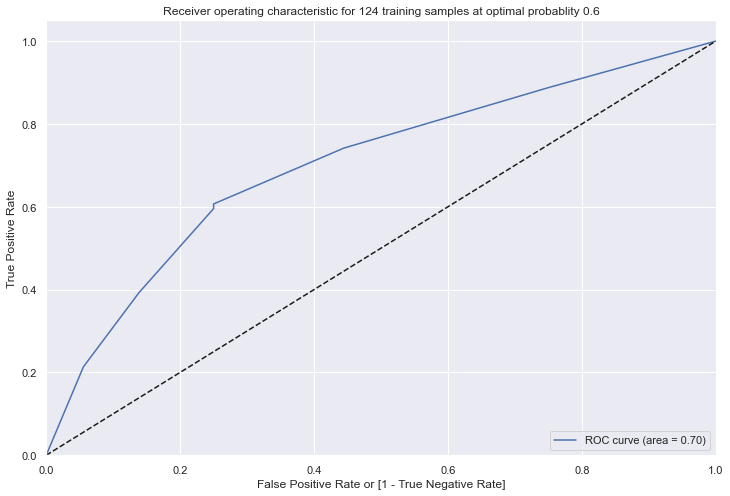

In [190]:
draw_roc(y_train_pred_final.Actual_location_val, y_train_pred_final.Val_Prob)

### Finding Optimal Cutoff Point¶

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [191]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Val_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(20)

,Actual_location_val,Val_Prob,ID,predicted_prob_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.526313,154,1,1,1,1,1,1,1,0,0,0,0
1,0,0.649762,140,1,1,1,1,1,1,1,1,0,0,0
2,0,0.532876,12,1,1,1,1,1,1,1,0,0,0,0
3,0,0.532876,16,1,1,1,1,1,1,1,0,0,0,0
4,1,0.856348,117,1,1,1,1,1,1,1,1,1,1,0
5,0,0.649762,81,1,1,1,1,1,1,1,1,0,0,0
6,1,0.532876,73,1,1,1,1,1,1,1,0,0,0,0
7,1,0.856348,110,1,1,1,1,1,1,1,1,1,1,0
8,1,0.841553,45,1,1,1,1,1,1,1,1,1,1,0
9,1,0.812853,126,1,1,1,1,1,1,1,1,1,1,0


### Observation: For probablity between 0.6 and 0.7 Actual_location_val and predicted value are coherrent.

In [192]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_location_val, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0     0.712  1.000000  0.000000
0.1   0.1     0.712  1.000000  0.000000
0.2   0.2     0.712  1.000000  0.000000
0.3   0.3     0.712  1.000000  0.000000
0.4   0.4     0.712  1.000000  0.000000
0.5   0.5     0.712  1.000000  0.000000
0.6   0.6     0.688  0.741573  0.555556
0.7   0.7     0.640  0.595506  0.750000
0.8   0.8     0.640  0.595506  0.750000
0.9   0.9     0.288  0.000000  1.000000


###  accuracy, sensitivity and specificity for various probability cutoffs.

In [193]:
cutoff_df.style.set_table_attributes("style='display:inline'").set_caption('accuracy, sensitivity and specificity for various probability cutoffs.')

,prob,accuracy,sensi,speci
0.0,0.000000,0.712000,1.000000,0.000000
0.1,0.100000,0.712000,1.000000,0.000000
0.2,0.200000,0.712000,1.000000,0.000000
0.3,0.300000,0.712000,1.000000,0.000000
0.4,0.400000,0.712000,1.000000,0.000000
0.5,0.500000,0.712000,1.000000,0.000000
0.6,0.600000,0.688000,0.741573,0.555556
0.7,0.700000,0.640000,0.595506,0.750000
0.8,0.800000,0.640000,0.595506,0.750000
0.9,0.900000,0.288000,0.000000,1.000000


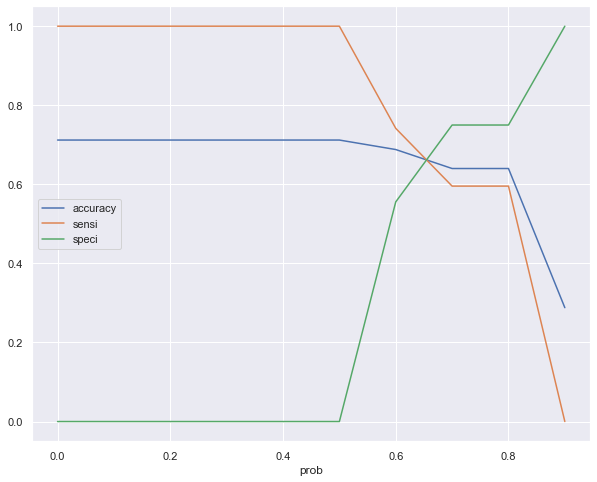

In [194]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(10, 8))
plt.show()

#### From the curve above, 0.6 is the optimum point to take it as a cutoff probability.

## Updating  column 'predicted' with 1 if Val_Prob > 0.60 else 0

In [195]:
y_train_pred_final['predicted'] = y_train_pred_final.Val_Prob.map(lambda x: 1 if x > 0.60 else 0)

# Let's see the head
y_train_pred_final.head()

,Actual_location_val,Val_Prob,ID,predicted_prob_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,1,0.526313,154,1,1,1,1,1,1,1,0,0,0,0,0
1,0,0.649762,140,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.532876,12,1,1,1,1,1,1,1,0,0,0,0,0
3,0,0.532876,16,1,1,1,1,1,1,1,0,0,0,0,0
4,1,0.856348,117,1,1,1,1,1,1,1,1,1,1,0,1


In [196]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Actual_location_val, y_train_pred_final.predicted )
print(confusion)

[[20 16]
 [23 66]]


In [197]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Actual_location_val, y_train_pred_final.predicted))

0.688


### Observation: From the curve above, we reconfirm approximatly 0.6 is the optimum point to take it as a cutoff probability.

 ### Making predictions on the test set

### Feature Scaling for test data set

In [198]:
scaler = StandardScaler()

X_test[['Naphtha','MS','ATF','SKO','HSD','LDO','Coal-Consumption','GDP-growth']] = scaler.fit_transform(X_test[['Naphtha','MS','ATF','SKO','HSD','LDO','Coal-Consumption','GDP-growth']])

X_test.head()

,Naphtha,MS,ATF,SKO,HSD,LDO,Coal-Consumption,GDP-growth
88,-1.507474,-0.254794,0.438155,0.097616,0.470525,-0.489490,-0.697926,0.499882
145,-1.507474,-0.254794,0.438155,0.097616,0.470525,-0.489490,-0.697926,0.499882
11,-0.863711,-1.165239,0.036970,1.068979,-0.731286,-1.026967,-0.704918,0.776216
74,-0.863711,-1.165239,0.036970,1.068979,-0.731286,-1.026967,-0.704918,0.776216
173,0.707467,0.423222,-2.047577,-1.184059,-1.520502,1.891176,0.978669,-2.159356


In [199]:
X_test.shape

(54, 8)

In [200]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [201]:
y_test_pred = res.predict(X_test_sm)

In [202]:
y_test_pred.shape

(54,)

In [203]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [204]:
# Let's see the head
y_pred_1.head()

,0
88,0.668404
145,0.668404
11,0.567751
74,0.567751
173,0.772634


In [205]:
y_test.shape

(54,)

In [206]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [207]:
y_test_df

,Location_val
88,1
145,0
11,0
74,0
173,1
150,0
151,1
97,1
90,0
96,1


In [208]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [209]:
y_test_df

,Location_val,ID
88,1,88
145,0,145
11,0,11
74,0,74
173,1,173
150,0,150
151,1,151
97,1,97
90,0,90
96,1,96


In [210]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [211]:
y_pred_final

,Location_val,ID,0
88,1,88,0.668404
145,0,145,0.668404
11,0,11,0.567751
74,0,74,0.567751
173,1,173,0.772634
150,0,150,0.533421
151,1,151,0.533421
97,1,97,0.533421
90,0,90,0.533421
96,1,96,0.533421


In [212]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Val_Prob'})

In [213]:
y_pred_final

,Location_val,ID,Val_Prob
88,1,88,0.668404
145,0,145,0.668404
11,0,11,0.567751
74,0,74,0.567751
173,1,173,0.772634
150,0,150,0.533421
151,1,151,0.533421
97,1,97,0.533421
90,0,90,0.533421
96,1,96,0.533421


In [214]:
# Rearranging the columns
y_pred_final = y_pred_final[['ID','Location_val','Val_Prob']]

In [215]:
y_pred_final

,ID,Location_val,Val_Prob
88,88,1,0.668404
145,145,0,0.668404
11,11,0,0.567751
74,74,0,0.567751
173,173,1,0.772634
150,150,0,0.533421
151,151,1,0.533421
97,97,1,0.533421
90,90,0,0.533421
96,96,1,0.533421


In [216]:
y_pred_final['final_predicted'] = y_pred_final.Val_Prob.map(lambda x: 1 if x > 0.6 else 0)

In [217]:
y_pred_final.head()

,ID,Location_val,Val_Prob,final_predicted
88,88,1,0.668404,1
145,145,0,0.668404,1
11,11,0,0.567751,0
74,74,0,0.567751,0
173,173,1,0.772634,1


In [218]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Location_val, y_pred_final.final_predicted)

0.6481481481481481

In [219]:
confusion2 = metrics.confusion_matrix(y_pred_final.Location_val, y_pred_final.final_predicted )
confusion2

array([[ 9, 11],
       [ 8, 26]], dtype=int64)

In [220]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [221]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7647058823529411

In [222]:
# Let us calculate specificity
TN / float(TN+FP)

0.45